

<font size='8px'><font color=#800080>**Project Name**</font> - <font color='#3792cb'>**Email Campaign Effectiveness Prediction**</font>







##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

The goal of this project is to create a machine learning model that can characterize and track emails sent through Gmail-based email marketing campaigns. This model will be used by small to medium business owners who are looking to improve the effectiveness of their email marketing efforts and increase customer retention.

One of the main challenges in email marketing is determining which emails are being read, ignored, or acknowledged by the reader. By understanding which emails are most effective at engaging the reader, business owners can tailor their marketing efforts and increase their chances of success.

To address this problem, we will gather data on a variety of email characteristics, including the subject line, sender name, email content, email format, and email frequency. We will also consider the target audience of the emails and any other relevant factors.

Using this data, we will train a machine learning model to predict whether an email is likely to be read, ignored, or acknowledged by the reader. This model will be able to analyze new emails and provide a prediction of how they are likely to be received by the reader.

To evaluate the performance of the model, we will split our data into a training set and a testing set. We will use the training set to fit the model and the testing set to evaluate its performance. We will use a variety of metrics, such as precision, recall, and F1 score, to assess the model's accuracy and effectiveness.

Once the model is trained and evaluated, it can be deployed in a production environment to help small to medium business owners improve the effectiveness of their email marketing campaigns. By using the model to characterize and track emails, they will be able to make more informed decisions about how to target their marketing efforts and increase customer retention.

Overall, this project aims to provide small to medium business owners with a powerful tool for improving the effectiveness of their email marketing campaigns. By using machine learning to characterize and track emails, they will be able to make more informed decisions and increase the chances of success for their marketing efforts.

# **GitHub Link -**

# **Problem Statement**


Small to medium business owners are using Gmail-based email marketing strategies to convert prospective customers into leads, but they are unable to track which emails are being ignored, read, or acknowledged by the reader. They want to create a machine learning model to help characterize and track these emails. The main objective is to improve the effectiveness of their email marketing efforts and increase customer retention.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [299]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import *
from scipy import stats
import math


from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, f1_score, classification_report, roc_auc_score

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [300]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [301]:
# Dataset First Look
df=pd.read_csv("/content/drive/MyDrive/data_email_campaign.csv")
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [302]:
# Dataset Rows & Columns count
df.shape


(68353, 12)

### Dataset Information

In [303]:
# Dataset Info
print("Information Of Dataset:\n")
df.info()

Information Of Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [304]:
# Dataset Duplicate Value Count
print("Count Of Duplicate Values:\n")
duplicate=df.duplicated()
df[duplicate].sum()

Count Of Duplicate Values:



Email_ID                     0.0
Email_Type                   0.0
Subject_Hotness_Score        0.0
Email_Source_Type            0.0
Customer_Location            0.0
Email_Campaign_Type          0.0
Total_Past_Communications    0.0
Time_Email_sent_Category     0.0
Word_Count                   0.0
Total_Links                  0.0
Total_Images                 0.0
Email_Status                 0.0
dtype: float64

#### Missing Values/Null Values

In [305]:
# Missing Values/Null Values Count
print("Null Values In DataSet\n")
null_values=pd.DataFrame(df.isnull().sum().reset_index(name="Null Values"))
null_values=null_values[null_values["Null Values"]!=0]
null_values_percentage=null_values["Null Values"]/len(df)*100
pd.DataFrame(null_values)

Null Values In DataSet



,index,Null Values
4,Customer_Location,11595
6,Total_Past_Communications,6825
9,Total_Links,2201
10,Total_Images,1677


In [306]:
#Removing Missing Values
df.dropna(inplace=True)

In [307]:
df.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

### What did you know about your dataset?

Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

In the above dataset there are total 68353 rows and  12 columns with null values and 48291 rows and 12 columns after removing null values

## ***2. Understanding Your Variables***

In [308]:
# Dataset Columns
print("Columns In DataSets:\n")
list(df.columns)

Columns In DataSets:



['Email_ID',
 'Email_Type',
 'Subject_Hotness_Score',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Total_Past_Communications',
 'Time_Email_sent_Category',
 'Word_Count',
 'Total_Links',
 'Total_Images',
 'Email_Status']

In [309]:
# Dataset Describe
df.describe(include="all")

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,48291,48291.000000,48291.000000,48291.000000,48291,48291.000000,48291.000000,48291.000000,48291.000000,48291.000000,48291.000000,48291.000000
unique,48291,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EMA00081000034500,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,19756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.285436,1.097095,1.458015,NaN,2.273343,28.899464,1.999607,700.489449,10.439357,3.545795,0.231865
std,NaN,0.451627,0.998007,0.498239,NaN,0.468336,12.533461,0.630800,271.981666,6.388488,5.590190,0.497598
min,NaN,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,NaN,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,NaN,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,NaN,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


### Variables Description

**Email_Id :** Email Id Of Customer \
**Email_Type :** 1 For marketing Emails & 2 for business Emails \
**Subject_Hotness_Score :** Score on the basis of how good and effective the content is. \
**Email_Source_Type :** Source of the Emails like 1 for marketing or 2 for business. \
**Customer_Location :** Location of the customer. \
**Email_Campaign_Type :** Type of Email 1 for marketing,2 for business, 3 for important admin mails related to products. \
**Total_Past_Communications :** The total previous mails from the same source the no of communication had. \
**Time_Email_sent_Category :** The time at which the mail was sent. 1 for morning, 2 for evening, 3 for night. \
**Word_Count :** The no of words contain the mail. \
**Total_Links :** Number Of links in the mails. \
**Total_Images :** Number of images in the link. \
**Email_Status :** target variable which contain 0 for the mail was ignored, 1 for read, 2 for acknowledged by reader.

### Check Unique Values for each variable.

In [310]:
for i in df:
  print("\n Unique Values In ",i,"\n",df[i].unique(),"\nWith Count Of:",df[i].nunique())


 Unique Values In  Email_ID 
 ['EMA00081000034500' 'EMA00081000066290' 'EMA00081000076560' ...
 'EMA00089998225300' 'EMA00089999168800' 'EMA00089999316900'] 
With Count Of: 48291

 Unique Values In  Email_Type 
 [1 2] 
With Count Of: 2

 Unique Values In  Subject_Hotness_Score 
 [2.2 0.1 3.  0.  3.2 0.7 0.5 0.2 1.  2.1 1.6 0.3 2.3 1.4 0.8 0.6 1.8 1.7
 2.4 3.3 2.8 2.6 1.1 1.9 1.3 4.1 2.9 1.5 2.7 0.4 0.9 1.2 3.1 2.  3.7 3.8
 2.5 4.6 3.6 3.5 3.4 4.7 5.  3.9 4.2 4.3 4.  4.4 4.8 4.5 4.9] 
With Count Of: 51

 Unique Values In  Email_Source_Type 
 [2 1] 
With Count Of: 2

 Unique Values In  Customer_Location 
 ['E' 'B' 'C' 'G' 'D' 'F' 'A'] 
With Count Of: 7

 Unique Values In  Email_Campaign_Type 
 [2 3 1] 
With Count Of: 3

 Unique Values In  Total_Past_Communications 
 [33. 36. 25. 18. 34. 21. 40. 27. 24. 42. 37. 35. 51.  9. 39. 31. 50. 30.
 14. 53. 28.  7. 22. 43. 16. 11. 20. 41. 45. 52. 29.  5. 32. 15. 23. 44.
 10. 38. 46. 17. 47. 49. 48. 26. 56.  6. 19. 60.  8. 59. 13. 12.  0. 55.
 54. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [311]:
# Drop Column Having Categorical values
df1=df.drop(["Email_ID","Customer_Location"],axis=1)

In [312]:
ignored=df1[df1["Email_Status"]==0]
read=df1[df1["Email_Status"]==1]
acknowledge=df1[df1["Email_Status"]==2]
print("Emails Ignored By The User :",len(ignored))
print("Emails Read By The User :",len(read))
print("Emails Acknowledge By The User :",len(acknowledge))


Emails Ignored By The User : 38772
Emails Read By The User : 7841
Emails Acknowledge By The User : 1678


In [313]:
#Ignored Emails Details
ignored.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,38772.000000,38772.000000,38772.000000,38772.000000,38772.000000,38772.000000,38772.000000,38772.000000,38772.000000,38772.0
mean,1.290596,1.162803,1.462937,2.230450,27.353735,1.998401,725.685546,10.549159,3.609254,0.0
std,0.454043,0.989608,0.498631,0.424603,11.638994,0.631139,265.562425,6.446682,5.672013,0.0
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.0
25%,1.000000,0.300000,1.000000,2.000000,19.000000,2.000000,550.000000,6.000000,0.000000,0.0
50%,1.000000,1.000000,1.000000,2.000000,26.000000,2.000000,713.000000,9.000000,0.000000,0.0
75%,2.000000,1.800000,2.000000,2.000000,35.000000,2.000000,904.000000,14.000000,5.000000,0.0
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,0.0


In [314]:
#Read Emails Details
read.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.000000,7841.0
mean,1.256727,0.900969,1.447009,2.426604,34.714322,2.007652,593.271777,9.895422,3.213493,1.0
std,0.436856,1.028877,0.497216,0.571430,13.843569,0.628362,276.032766,6.075757,5.165113,0.0
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,1.0
25%,1.000000,0.100000,1.000000,2.000000,26.000000,2.000000,392.000000,6.000000,0.000000,1.0
50%,1.000000,0.300000,1.000000,2.000000,36.000000,2.000000,578.000000,9.000000,0.000000,1.0
75%,2.000000,1.500000,2.000000,3.000000,45.000000,2.000000,771.000000,11.000000,5.000000,1.0
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,40.000000,1.0


In [315]:
#acknowledge Emails Details
acknowledge.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.0
mean,1.300358,0.495292,1.395709,2.548272,37.443385,1.989869,619.315852,10.443981,3.632300,2.0
std,0.458550,0.669763,0.489148,0.627149,14.464360,0.634351,261.609762,6.336717,5.544321,0.0
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,2.0
25%,1.000000,0.100000,1.000000,2.000000,31.000000,2.000000,440.000000,6.000000,0.000000,2.0
50%,1.000000,0.200000,1.000000,3.000000,40.000000,2.000000,610.000000,9.000000,0.000000,2.0
75%,2.000000,0.600000,2.000000,3.000000,47.000000,2.000000,790.750000,14.000000,6.000000,2.0
max,2.000000,3.800000,2.000000,3.000000,67.000000,3.000000,1262.000000,49.000000,38.000000,2.0


In [316]:
import pandas as pd

# Assuming df is your DataFrame
p = df.groupby("Time_Email_sent_Category").size().reset_index(name='Count')

# Display the result
print(p)


   Time_Email_sent_Category  Count
0                         1   9617
1                         2  29076
2                         3   9598


In [317]:
#Email source type count on Email type
Email_source_type_count_on_Email_type=pd.DataFrame(df.groupby("Email_Type")["Email_Source_Type"].value_counts().reset_index(name="Count"))
Email_source_type_count_on_Email_type

,Email_Type,Email_Source_Type,Count
0,1,2,18766
1,1,1,15741
2,2,1,10432
3,2,2,3352


In [318]:
#Email Campaign Type count on Email type
Email_Campaign_Type_count_on_Email_type=pd.DataFrame(df.groupby("Email_Type")["Email_Campaign_Type"].value_counts().reset_index(name="Count"))
Email_Campaign_Type_count_on_Email_type

,Email_Type,Email_Campaign_Type,Count
0,1,2,27059
1,1,3,7223
2,1,1,225
3,2,2,7032
4,2,3,6477
5,2,1,275


In [319]:
#Customer Location on Email type
Customer_Location_on_Email_type=pd.DataFrame(df.groupby("Email_Type")["Customer_Location"].value_counts().reset_index(name="Count"))
Customer_Location_on_Email_type

,Email_Type,Customer_Location,Count
0,1,G,14171
1,1,E,6130
2,1,D,4472
3,1,C,3527
4,1,B,2679
5,1,F,2671
6,1,A,857
7,2,G,5585
8,2,E,2530
9,2,D,1785


In [320]:
#Time Email sent Category on Email type
Time_Email_sent_Category_on_Email_type=pd.DataFrame(df.groupby("Email_Type")["Time_Email_sent_Category"].value_counts().reset_index(name="Count"))
Time_Email_sent_Category_on_Email_type

,Email_Type,Time_Email_sent_Category,Count
0,1,2,20699
1,1,3,6916
2,1,1,6892
3,2,2,8377
4,2,1,2725
5,2,3,2682


In [321]:
#columns having numerical features
num_features=df.select_dtypes(include=["float","int"]).columns.to_list()
num_features

['Email_Type',
 'Subject_Hotness_Score',
 'Email_Source_Type',
 'Email_Campaign_Type',
 'Total_Past_Communications',
 'Time_Email_sent_Category',
 'Word_Count',
 'Total_Links',
 'Total_Images',
 'Email_Status']

In [322]:
df.groupby('Email_Type')[num_features].agg(["sum","mean","median","count"]).T

Email_Type                                   1             2
Email_Type                sum     3.450700e+04  2.756800e+04
                          mean    1.000000e+00  2.000000e+00
                          median  1.000000e+00  2.000000e+00
                          count   3.450700e+04  1.378400e+04
Subject_Hotness_Score     sum     4.301770e+04  9.962100e+03
                          mean    1.246637e+00  7.227293e-01
                          median  1.100000e+00  3.000000e-01
                          count   3.450700e+04  1.378400e+04
Email_Source_Type         sum     5.327300e+04  1.713600e+04
                          mean    1.543832e+00  1.243180e+00
                          median  2.000000e+00  1.000000e+00
                          count   3.450700e+04  1.378400e+04
Email_Campaign_Type       sum     7.601200e+04  3.377000e+04
                          mean    2.202799e+00  2.449942e+00
                          median  2.000000e+00  2.000000e+00
                          count   3.450700e+04  1.378400e+04
Total_Past_Communications sum     1.009812e+06  3.857720e+05
                          mean    2.926398e+01  2.798694e+01
                          median  2.900000e+01  2.800000e+01
                          count   3.450700e+04  1.378400e+04
Time_Email_sent_Category  sum     6.903800e+04  2.752500e+04
                          mean    2.000696e+00  1.996880e+00
                          median  2.000000e+00  2.000000e+00
                          count   3.450700e+04  1.378400e+04
Word_Count                sum     2.370327e+07  1.012407e+07
                          mean    6.869119e+02  7.344795e+02
                          median  6.780000e+02  7.220000e+02
                          count   3.450700e+04  1.378400e+04
Total_Links               sum     3.830030e+05  1.211240e+05
                          mean    1.109928e+01  8.787290e+00
                          median  9.000000e+00  8.000000e+00
                          count   3.450700e+04  1.378400e+04
Total_Images              sum     1.358120e+05  3.541800e+04
                          mean    3.935781e+00  2.569501e+00
                          median  1.000000e+00  0.000000e+00
                          count   3.450700e+04  1.378400e+04
Email_Status              sum     8.176000e+03  3.021000e+03
                          mean    2.369374e-01  2.191672e-01
                          median  0.000000e+00  0.000000e+00
                          count   3.450700e+04  1.378400e+04

In [323]:
df.groupby("Subject_Hotness_Score")[num_features].agg(["sum","mean","median","count"]).T

Subject_Hotness_Score                      0.0           0.1           0.2  \
Email_Type                sum     5.584000e+03  6.246000e+03  6.432000e+03   
                          mean    1.462546e+00  1.460028e+00  1.432517e+00   
                          median  1.000000e+00  1.000000e+00  1.000000e+00   
                          count   3.818000e+03  4.278000e+03  4.490000e+03   
Subject_Hotness_Score     sum     0.000000e+00  4.278000e+02  8.980000e+02   
                          mean    0.000000e+00  1.000000e-01  2.000000e-01   
                          median  0.000000e+00  1.000000e-01  2.000000e-01   
                          count   3.818000e+03  4.278000e+03  4.490000e+03   
Email_Source_Type         sum     5.657000e+03  6.355000e+03  6.593000e+03   
                          mean    1.481666e+00  1.485507e+00  1.468374e+00   
                          median  1.000000e+00  1.000000e+00  1.000000e+00   
                          count   3.818000e+03  4.278000e+03  4.490000e+03   
Email_Campaign_Type       sum     1.092700e+04  1.192500e+04  1.219300e+04   
                          mean    2.861970e+00  2.787518e+00  2.715590e+00   
                          median  3.000000e+00  3.000000e+00  3.000000e+00   
                          count   3.818000e+03  4.278000e+03  4.490000e+03   
Total_Past_Communications sum     1.295720e+05  1.444210e+05  1.533210e+05   
                          mean    3.393714e+01  3.375900e+01  3.414722e+01   
                          median  3.500000e+01  3.500000e+01  3.500000e+01   
                          count   3.818000e+03  4.278000e+03  4.490000e+03   
Time_Email_sent_Category  sum     7.651000e+03  8.530000e+03  8.909000e+03   
                          mean    2.003929e+00  1.993922e+00  1.984187e+00   
                          median  2.000000e+00  2.000000e+00  2.000000e+00   
                          count   3.818000e+03  4.278000e+03  4.490000e+03   
Word_Count                sum     2.782261e+06  3.153729e+06  3.295368e+06   
                          mean    7.287221e+02  7.371971e+02  7.339350e+02   
                          median  7.220000e+02  7.300000e+02  7.220000e+02   
                          count   3.818000e+03  4.278000e+03  4.490000e+03   
Total_Links               sum     3.781100e+04  4.289600e+04  4.536900e+04   
                          mean    9.903353e+00  1.002712e+01  1.010445e+01   
                          median  9.000000e+00  9.000000e+00  9.000000e+00   
                          count   3.818000e+03  4.278000e+03  4.490000e+03   
Total_Images              sum     1.237500e+04  1.407800e+04  1.573900e+04   
                          mean    3.241226e+00  3.290790e+00  3.505345e+00   
                          median  0.000000e+00  0.000000e+00  0.000000e+00   
                          count   3.818000e+03  4.278000e+03  4.490000e+03   
Email_Status              sum     1.590000e+03  1.613000e+03  1.625000e+03   
                          mean    4.164484e-01  3.770453e-01  3.619154e-01   
                          median  0.000000e+00  0.000000e+00  0.000000e+00   
                          count   3.818000e+03  4.278000e+03  4.490000e+03   

Subject_Hotness_Score                      0.3           0.4           0.5  \
Email_Type                sum     6.871000e+03  1.806000e+03  1.743000e+03   
                          mean    1.410304e+00  1.279943e+00  1.253055e+00   
                          median  1.000000e+00  1.000000e+00  1.000000e+00   
                          count   4.872000e+03  1.411000e+03  1.391000e+03   
Subject_Hotness_Score     sum     1.461600e+03  5.644000e+02  6.955000e+02   
                          mean    3.000000e-01  4.000000e-01  5.000000e-01   
                          median  3.000000e-01  4.000000e-01  5.000000e-01   
                          count   4.872000e+03  1.411000e+03  1.391000e+03   
Email_Source_Type         sum     7.131000e+03  1.977000e+03  1.959000e+03   
                     

In [324]:
df.groupby("Email_Source_Type")[num_features].agg(["sum","mean","median","count"]).T

Email_Source_Type                            1             2
Email_Type                sum     3.660500e+04  2.547000e+04
                          mean    1.398579e+00  1.151551e+00
                          median  1.000000e+00  1.000000e+00
                          count   2.617300e+04  2.211800e+04
Subject_Hotness_Score     sum     2.855230e+04  2.442750e+04
                          mean    1.090907e+00  1.104417e+00
                          median  8.000000e-01  8.000000e-01
                          count   2.617300e+04  2.211800e+04
Email_Source_Type         sum     2.617300e+04  4.423600e+04
                          mean    1.000000e+00  2.000000e+00
                          median  1.000000e+00  2.000000e+00
                          count   2.617300e+04  2.211800e+04
Email_Campaign_Type       sum     5.907200e+04  5.071000e+04
                          mean    2.256982e+00  2.292703e+00
                          median  2.000000e+00  2.000000e+00
                          count   2.617300e+04  2.211800e+04
Total_Past_Communications sum     7.778370e+05  6.177470e+05
                          mean    2.971906e+01  2.792960e+01
                          median  3.000000e+01  2.700000e+01
                          count   2.617300e+04  2.211800e+04
Time_Email_sent_Category  sum     5.233600e+04  4.422700e+04
                          mean    1.999618e+00  1.999593e+00
                          median  2.000000e+00  2.000000e+00
                          count   2.617300e+04  2.211800e+04
Word_Count                sum     1.801646e+07  1.581088e+07
                          mean    6.883604e+02  7.148421e+02
                          median  6.840000e+02  7.040000e+02
                          count   2.617300e+04  2.211800e+04
Total_Links               sum     2.637400e+05  2.403870e+05
                          mean    1.007680e+01  1.086839e+01
                          median  9.000000e+00  9.000000e+00
                          count   2.617300e+04  2.211800e+04
Total_Images              sum     8.656600e+04  8.466400e+04
                          mean    3.307454e+00  3.827833e+00
                          median  0.000000e+00  0.000000e+00
                          count   2.617300e+04  2.211800e+04
Email_Status              sum     6.364000e+03  4.833000e+03
                          mean    2.431513e-01  2.185098e-01
                          median  0.000000e+00  0.000000e+00
                          count   2.617300e+04  2.211800e+04

In [325]:
df.groupby("Email_Campaign_Type")[num_features].agg(["sum","mean","median","count"]).T

Email_Campaign_Type                         1             2             3
Email_Type                sum        775.0000  4.112300e+04  2.017700e+04
                          mean         1.5500  1.206271e+00  1.472774e+00
                          median       2.0000  1.000000e+00  1.000000e+00
                          count      500.0000  3.409100e+04  1.370000e+04
Subject_Hotness_Score     sum         76.2000  5.084980e+04  2.053800e+03
                          mean         0.1524  1.491590e+00  1.499124e-01
                          median       0.2000  1.400000e+00  1.000000e-01
                          count      500.0000  3.409100e+04  1.370000e+04
Email_Source_Type         sum        755.0000  4.922500e+04  2.042900e+04
                          mean         1.5100  1.443929e+00  1.491168e+00
                          median       2.0000  1.000000e+00  1.000000e+00
                          count      500.0000  3.409100e+04  1.370000e+04
Email_Campaign_Type       sum        500.0000  6.818200e+04  4.110000e+04
                          mean         1.0000  2.000000e+00  3.000000e+00
                          median       1.0000  2.000000e+00  3.000000e+00
                          count      500.0000  3.409100e+04  1.370000e+04
Total_Past_Communications sum          0.0000  9.114330e+05  4.841510e+05
                          mean         0.0000  2.673530e+01  3.533949e+01
                          median       0.0000  2.600000e+01  3.600000e+01
                          count      500.0000  3.409100e+04  1.370000e+04
Time_Email_sent_Category  sum        975.0000  6.820800e+04  2.738000e+04
                          mean         1.9500  2.000763e+00  1.998540e+00
                          median       2.0000  2.000000e+00  2.000000e+00
                          count      500.0000  3.409100e+04  1.370000e+04
Word_Count                sum     328507.0000  2.354362e+07  9.955209e+06
                          mean       657.0140  6.906110e+02  7.266576e+02
                          median     675.5000  6.840000e+02  7.210000e+02
                          count      500.0000  3.409100e+04  1.370000e+04
Total_Links               sum        500.0000  3.649550e+05  1.386720e+05
                          mean         1.0000  1.070532e+01  1.012204e+01
                          median       1.0000  9.000000e+00  9.000000e+00
                          count      500.0000  3.409100e+04  1.370000e+04
Total_Images              sum          0.0000  1.255100e+05  4.572000e+04
                          mean         0.0000  3.681617e+00  3.337226e+00
                          median       0.0000  0.000000e+00  0.000000e+00
                          count      500.0000  3.409100e+04  1.370000e+04
Email_Status              sum        565.0000  4.882000e+03  5.750000e+03
                          mean         1.1300  1.432050e-01  4.197080e-01
                          median       1.0000  0.000000e+00  0.000000e+00
                          count      500.0000  3.409100e+04  1.370000e+04

In [326]:
df.groupby("Time_Email_sent_Category")[num_features].agg(["sum","mean","median","count"]).T

Time_Email_sent_Category                     1             2             3
Email_Type                sum     1.234200e+04  3.745300e+04  1.228000e+04
                          mean    1.283352e+00  1.288107e+00  1.279433e+00
                          median  1.000000e+00  1.000000e+00  1.000000e+00
                          count   9.617000e+03  2.907600e+04  9.598000e+03
Subject_Hotness_Score     sum     1.067370e+04  3.165660e+04  1.064950e+04
                          mean    1.109878e+00  1.088754e+00  1.109554e+00
                          median  9.000000e-01  8.000000e-01  8.000000e-01
                          count   9.617000e+03  2.907600e+04  9.598000e+03
Email_Source_Type         sum     1.402300e+04  4.239100e+04  1.399500e+04
                          mean    1.458147e+00  1.457938e+00  1.458116e+00
                          median  1.000000e+00  1.000000e+00  1.000000e+00
                          count   9.617000e+03  2.907600e+04  9.598000e+03
Email_Campaign_Type       sum     2.181100e+04  6.619300e+04  2.177800e+04
                          mean    2.267963e+00  2.276551e+00  2.269014e+00
                          median  2.000000e+00  2.000000e+00  2.000000e+00
                          count   9.617000e+03  2.907600e+04  9.598000e+03
Total_Past_Communications sum     2.763430e+05  8.426080e+05  2.766330e+05
                          mean    2.873484e+01  2.897950e+01  2.882194e+01
                          median  2.800000e+01  2.800000e+01  2.800000e+01
                          count   9.617000e+03  2.907600e+04  9.598000e+03
Time_Email_sent_Category  sum     9.617000e+03  5.815200e+04  2.879400e+04
                          mean    1.000000e+00  2.000000e+00  3.000000e+00
                          median  1.000000e+00  2.000000e+00  3.000000e+00
                          count   9.617000e+03  2.907600e+04  9.598000e+03
Word_Count                sum     6.754414e+06  2.036885e+07  6.704073e+06
                          mean    7.023411e+02  7.005382e+02  6.984865e+02
                          median  6.940000e+02  6.940000e+02  6.940000e+02
                          count   9.617000e+03  2.907600e+04  9.598000e+03
Total_Links               sum     1.008000e+05  3.023690e+05  1.009580e+05
                          mean    1.048144e+01  1.039926e+01  1.051865e+01
                          median  9.000000e+00  9.000000e+00  9.000000e+00
                          count   9.617000e+03  2.907600e+04  9.598000e+03
Total_Images              sum     3.436900e+04  1.025260e+05  3.433500e+04
                          mean    3.573776e+00  3.526138e+00  3.577308e+00
                          median  0.000000e+00  0.000000e+00  0.000000e+00
                          count   9.617000e+03  2.907600e+04  9.598000e+03
Email_Status              sum     2.210000e+03  6.751000e+03  2.236000e+03
                          mean    2.298014e-01  2.321846e-01  2.329652e-01
                          median  0.000000e+00  0.000000e+00  0.000000e+00
                          count   9.617000e+03  2.907600e+04  9.598000e+03

In [327]:
df.groupby("Email_Status")[num_features].agg(["sum","mean","median","count"]).T

Email_Status                                 0             1             2
Email_Type                sum     5.003900e+04  9.854000e+03  2.182000e+03
                          mean    1.290596e+00  1.256727e+00  1.300358e+00
                          median  1.000000e+00  1.000000e+00  1.000000e+00
                          count   3.877200e+04  7.841000e+03  1.678000e+03
Subject_Hotness_Score     sum     4.508420e+04  7.064500e+03  8.311000e+02
                          mean    1.162803e+00  9.009693e-01  4.952920e-01
                          median  1.000000e+00  3.000000e-01  2.000000e-01
                          count   3.877200e+04  7.841000e+03  1.678000e+03
Email_Source_Type         sum     5.672100e+04  1.134600e+04  2.342000e+03
                          mean    1.462937e+00  1.447009e+00  1.395709e+00
                          median  1.000000e+00  1.000000e+00  1.000000e+00
                          count   3.877200e+04  7.841000e+03  1.678000e+03
Email_Campaign_Type       sum     8.647900e+04  1.902700e+04  4.276000e+03
                          mean    2.230450e+00  2.426604e+00  2.548272e+00
                          median  2.000000e+00  2.000000e+00  3.000000e+00
                          count   3.877200e+04  7.841000e+03  1.678000e+03
Total_Past_Communications sum     1.060559e+06  2.721950e+05  6.283000e+04
                          mean    2.735373e+01  3.471432e+01  3.744338e+01
                          median  2.600000e+01  3.600000e+01  4.000000e+01
                          count   3.877200e+04  7.841000e+03  1.678000e+03
Time_Email_sent_Category  sum     7.748200e+04  1.574200e+04  3.339000e+03
                          mean    1.998401e+00  2.007652e+00  1.989869e+00
                          median  2.000000e+00  2.000000e+00  2.000000e+00
                          count   3.877200e+04  7.841000e+03  1.678000e+03
Word_Count                sum     2.813628e+07  4.651844e+06  1.039212e+06
                          mean    7.256855e+02  5.932718e+02  6.193159e+02
                          median  7.130000e+02  5.780000e+02  6.100000e+02
                          count   3.877200e+04  7.841000e+03  1.678000e+03
Total_Links               sum     4.090120e+05  7.759000e+04  1.752500e+04
                          mean    1.054916e+01  9.895422e+00  1.044398e+01
                          median  9.000000e+00  9.000000e+00  9.000000e+00
                          count   3.877200e+04  7.841000e+03  1.678000e+03
Total_Images              sum     1.399380e+05  2.519700e+04  6.095000e+03
                          mean    3.609254e+00  3.213493e+00  3.632300e+00
                          median  0.000000e+00  0.000000e+00  0.000000e+00
                          count   3.877200e+04  7.841000e+03  1.678000e+03
Email_Status              sum     0.000000e+00  7.841000e+03  3.356000e+03
                          mean    0.000000e+00  1.000000e+00  2.000000e+00
                          median  0.000000e+00  1.000000e+00  2.000000e+00
                          count   3.877200e+04  7.841000e+03  1.678000e+03

In [328]:
# columns havings categorical features
cat_features=[feature for feature in df.columns.to_list() if feature not in num_features]
cat_features

['Email_ID', 'Customer_Location']

In [329]:
import pandas as pd

# Assuming your DataFrame is named 'df' and it contains a column named 'Email_Status'
value_counts = df['Email_Status'].value_counts().reset_index()

# Rename the columns in the new DataFrame
value_counts.columns = ['Email_Status', 'Count']

# Create the Email_status_value_count DataFrame
Email_status_value_count = pd.DataFrame(value_counts)

# Display the result
print(Email_status_value_count)


   Email_Status  Count
0             0  38772
1             1   7841
2             2   1678


In [330]:
#Email status value count on Email Type
Email_status_value_count_on_Email_Type=pd.DataFrame(df.groupby("Email_Type")["Email_Status"].value_counts().reset_index(name="count"))
Email_status_value_count_on_Email_Type

,Email_Type,Email_Status,count
0,1,0,27505
1,1,1,5828
2,1,2,1174
3,2,0,11267
4,2,1,2013
5,2,2,504


In [331]:
#Total link on Email Type
Total_link_on_Email_Type=pd.DataFrame(df.groupby("Email_Type")["Total_Links"].value_counts().reset_index(name="count"))
Total_link_on_Email_Type

,Email_Type,Total_Links,count
0,1,11.0,6184
1,1,6.0,5213
2,1,4.0,3103
3,1,9.0,3082
4,1,8.0,2947
...,...,...,...
63,2,17.0,1
64,2,23.0,1
65,2,33.0,1
66,2,34.0,1


In [332]:
#Subject Hotness Score on Email Source Type
Subject_Hotness_Score_on_Email_Source_Type=pd.DataFrame(df.groupby("Email_Source_Type")["Subject_Hotness_Score"].value_counts().reset_index(name="Count"))
Subject_Hotness_Score_on_Email_Source_Type

,Email_Source_Type,Subject_Hotness_Score,Count
0,1,0.3,2613
1,1,0.2,2387
2,1,0.1,2201
3,1,0.0,1979
4,1,0.4,845
...,...,...,...
97,2,4.6,10
98,2,4.4,6
99,2,4.8,6
100,2,5.0,4


In [333]:
#Customer Location on Email Source Type
Customer_Location_on_Email_Source_Type=pd.DataFrame(df.groupby("Email_Source_Type")["Customer_Location"].value_counts().reset_index(name="Count"))
Customer_Location_on_Email_Source_Type

,Email_Source_Type,Customer_Location,Count
0,1,G,10666
1,1,E,4786
2,1,D,3363
3,1,C,2657
4,1,F,2054
5,1,B,1985
6,1,A,662
7,2,G,9090
8,2,E,3874
9,2,D,2894


In [334]:
#Email Campaign Type on Email Source Type
Email_Campaign_Type_on_Email_Source_Type=pd.DataFrame(df.groupby("Email_Source_Type")["Email_Campaign_Type"].value_counts().reset_index(name="Count"))
Email_Campaign_Type_on_Email_Source_Type

,Email_Source_Type,Email_Campaign_Type,Count
0,1,2,18957
1,1,3,6971
2,1,1,245
3,2,2,15134
4,2,3,6729
5,2,1,255


In [335]:
#Time Email sent Category on Email Source Type
Time_Email_sent_Category_on_Email_Source_Type=pd.DataFrame(df.groupby("Email_Source_Type")["Time_Email_sent_Category"].value_counts().reset_index(name="Count"))
Time_Email_sent_Category_on_Email_Source_Type

,Email_Source_Type,Time_Email_sent_Category,Count
0,1,2,15761
1,1,1,5211
2,1,3,5201
3,2,2,13315
4,2,1,4406
5,2,3,4397


In [336]:
#Email Status on Email Source Type
Email_Status_on_Email_Source_Type=pd.DataFrame(df.groupby("Email_Source_Type")["Email_Status"].value_counts().reset_index(name="Count"))
Email_Status_on_Email_Source_Type

,Email_Source_Type,Email_Status,Count
0,1,0,20823
1,1,1,4336
2,1,2,1014
3,2,0,17949
4,2,1,3505
5,2,2,664


In [337]:
Avg_Link=df.groupby("Email_Type")["Total_Links"].mean().reset_index(name="Avg Link")
Avg_Word_Count=df.groupby("Email_Type")["Word_Count"].mean().reset_index(name="Avg_Word_Count")
Avg_Images=df.groupby("Email_Type")["Total_Images"].mean().reset_index(name="Avg Images")

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

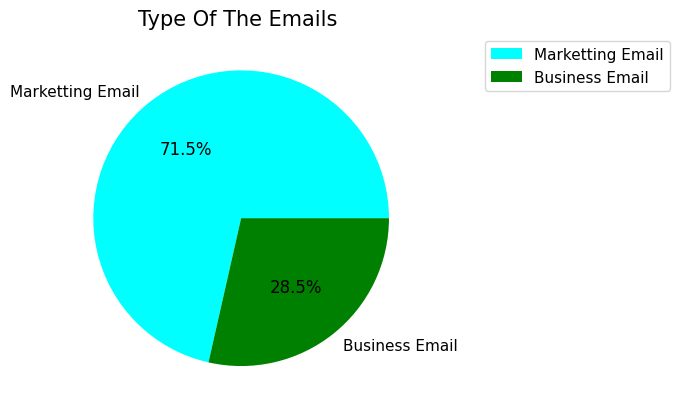

In [338]:
# Chart - 1 Type Of The Emails
data=df["Email_Type"].value_counts()

labels=["Marketting Email","Business Email"]
plt.pie(data,labels=labels,autopct="%.1f%%",colors=["cyan", "Green"])
plt.title('Type Of The Emails ',size=15,loc='center')
plt.legend(bbox_to_anchor=(0.9, 0, 0.78, 1))
plt.show()

##### 1. Why did you pick the specific chart?

For analysing the types of the emails out of 100% pie chart is best suitable for such type of visualisation

##### 2. What is/are the insight(s) found from the chart?

Most Of the types of the Emails are the marketting Email having total percentage of 71% and business Email having percentage out of total is 29%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights helps in creating a positive business impact. From thise pie chart we know that the most of the emails are marketting email which means the most of the business owener positively uses emails for business purpose and marketting thier product on email

#### Chart - 2

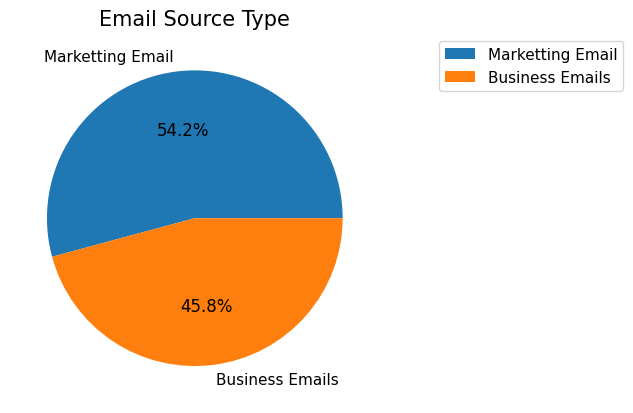

In [339]:
# Chart - 2 Email Source Type
data=df["Email_Source_Type"].value_counts()

labels=["Marketting Email","Business Emails"]
plt.pie(data,labels=labels,autopct="%.1f%%")
plt.title('Email Source Type',size=15,loc='center')
plt.legend(bbox_to_anchor=(0.9, 0, 0.78, 1))
plt.show()

##### 1. Why did you pick the specific chart?

For analysing the emails source type out of 100% pie chart is best suitable for such type of visualisation

##### 2. What is/are the insight(s) found from the chart?

Most Of the Email source types are the marketting Email having total percentage of 54% and business emails having percentage out of total is 46%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights helps in creating a positive business impact. From thise pie chart we know that the most of the emails are marketting email which means the most of the business owener positively uses emails for business purpose and marketting thier product on email

#### Chart - 3

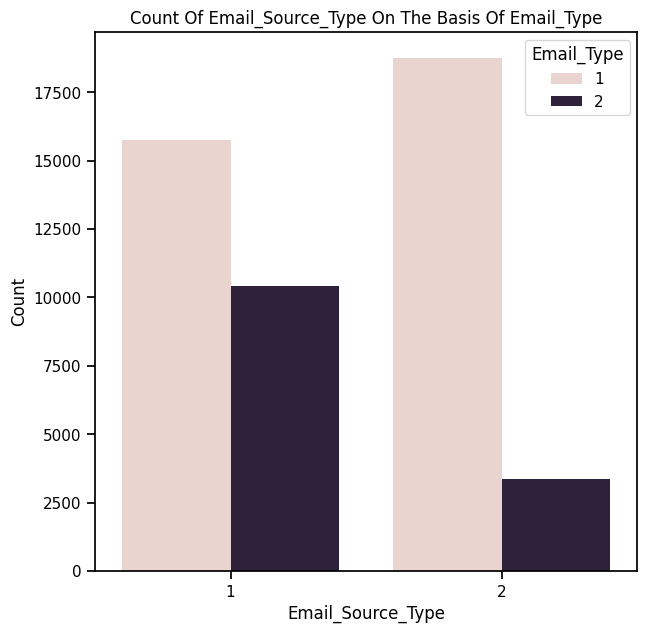

---------------------------------------------------------------------------------


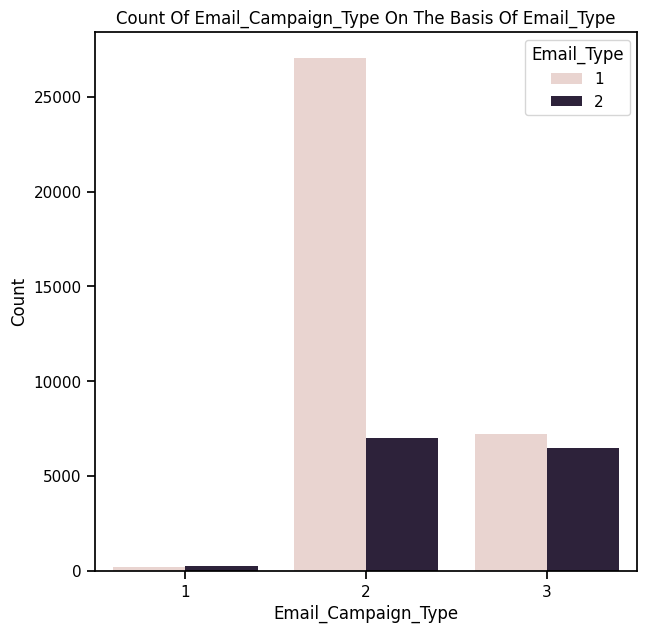

---------------------------------------------------------------------------------


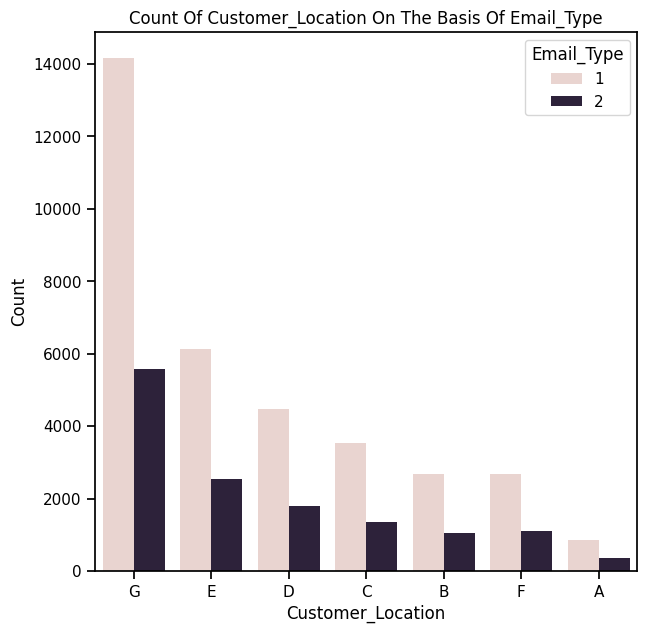

---------------------------------------------------------------------------------


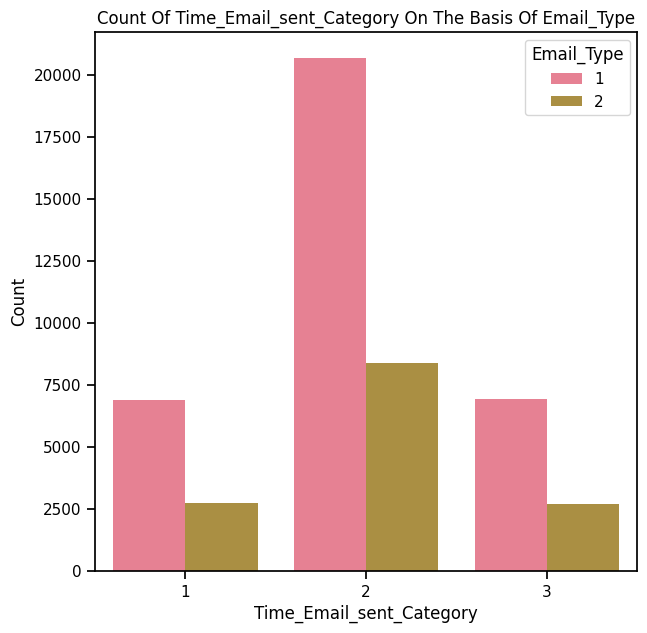

---------------------------------------------------------------------------------


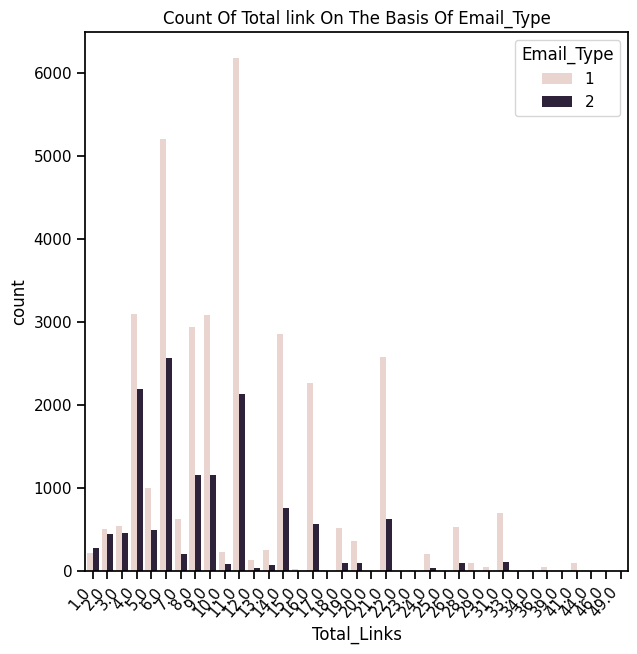

In [340]:
# Chart - 3 visualization code
plt.figure(figsize = (7,7))
plt.title("Count Of Email_Source_Type On The Basis Of Email_Type")
ax = sns.barplot(data = Email_source_type_count_on_Email_type, x = 'Email_Source_Type',y = "Count", hue = "Email_Type")
plt.show()
print("---------------------------------------------------------------------------------")

#  visualization code
plt.figure(figsize = (7,7))
plt.title("Count Of Email_Campaign_Type On The Basis Of Email_Type")
ax = sns.barplot(data = Email_Campaign_Type_count_on_Email_type, x = 'Email_Campaign_Type',y = "Count", hue = "Email_Type")

plt.show()

print("---------------------------------------------------------------------------------")

plt.figure(figsize = (7,7))
plt.title("Count Of Customer_Location On The Basis Of Email_Type")
ax = sns.barplot(data = Customer_Location_on_Email_type, x = 'Customer_Location',y = "Count", hue = "Email_Type")

plt.show()

print("---------------------------------------------------------------------------------")


# Get unique values in the 'Email_Type' column
unique_email_types = Time_Email_sent_Category_on_Email_type['Email_Type'].unique()

# Define a custom color palette for all unique values in 'Email_Type'
custom_palette = {email_type: sns.color_palette("husl")[i] for i, email_type in enumerate(unique_email_types)}

plt.figure(figsize=(7, 7))
plt.title("Count Of Time_Email_sent_Category On The Basis Of Email_Type")
ax = sns.barplot(data=Time_Email_sent_Category_on_Email_type, x='Time_Email_sent_Category', y='Count', hue='Email_Type', palette=custom_palette)

plt.show()

print("---------------------------------------------------------------------------------")

plt.figure(figsize = (7,7))
plt.title("Count Of Total link On The Basis Of Email_Type")
ax = sns.barplot(data = Total_link_on_Email_Type, x = "Total_Links",y = "count", hue = 'Email_Type')
plt.xticks(rotation=50, ha='right')
plt.show()



##### 1. Why did you pick the specific chart?

For comapring the different parameters of the dataset bar chart is used which better visualise the result and easy for understanding.

##### 2. What is/are the insight(s) found from the chart?

In above visualisation we are plotting diiferent variables of the dataset with respect to the Email_types. and understanding hows the correlation between Email_types and other variables

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights helps in creating a positive business impact.In above visualisation we are plotting diiferent variables of the dataset with respect to the Email_types. and understanding hows the correlation between Email_types and other variables

#### Chart - 4

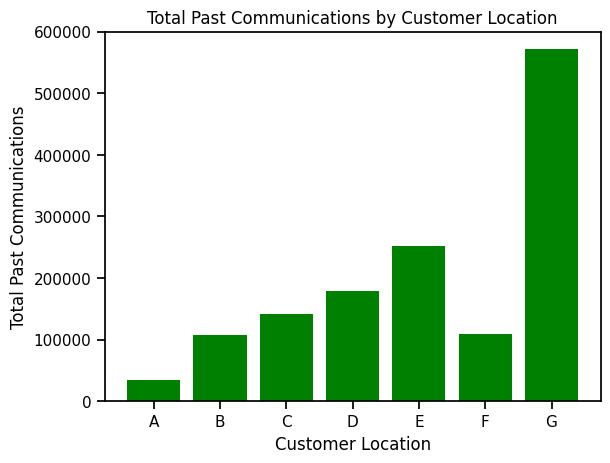

In [341]:
# Chart - 4 Total Past Communications by Customer Location

# Assuming df is your DataFrame
p = df.groupby("Customer_Location").agg({"Total_Past_Communications": sum}).reset_index()

# Convert to DataFrame
p_df = pd.DataFrame(p)

# Plotting a bar plot
plt.bar(p_df['Customer_Location'], p_df['Total_Past_Communications'],color="green")

# Adding labels and title
plt.xlabel('Customer Location')
plt.ylabel('Total Past Communications')
plt.title('Total Past Communications by Customer Location')

# Display the plot
plt.show()


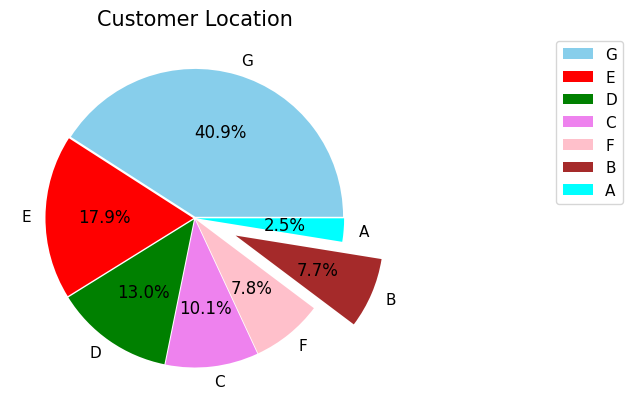

In [342]:
# Pie Chart Of Customer Location
data=df["Customer_Location"].value_counts()

labels=['G','E', 'D','C','F','B','A']
plt.pie(data,labels=labels,autopct="%.1f%%",explode=[0.01,0.01,0.01,0.01,0.01,0.3,0.01],colors=['skyblue','red','green','violet','pink','brown','cyan','magenta'])
plt.title('Customer Location',size=15,loc='center')
plt.legend(bbox_to_anchor=(0.9, 0, 0.78, 1))
plt.show()

##### 1. Why did you pick the specific chart?

+ For comapring the different parameters of the dataset bar chart is used which better visualise the result and easy for understanding. \
+ For analysing the emails source type out of 100% pie chart is best suitable for such type of visualisation

##### 2. What is/are the insight(s) found from the chart?

Chart 1: From thise chart we can know that the highest no of the total past communication is done with the G group customer location. \
chart 2 : From thise chart we know that the G community has maximum population out of all total  which is 40.9 % and A community has lowest population which is 2.5 %


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights helps in creating a positive business impact. the G community has maximum population out of all total which is 40.9 % and A community has lowest population which is 2.5%. From thise we can give more focused on customers with highest population community which ultimately provides positive business growth.

#### Chart - 5

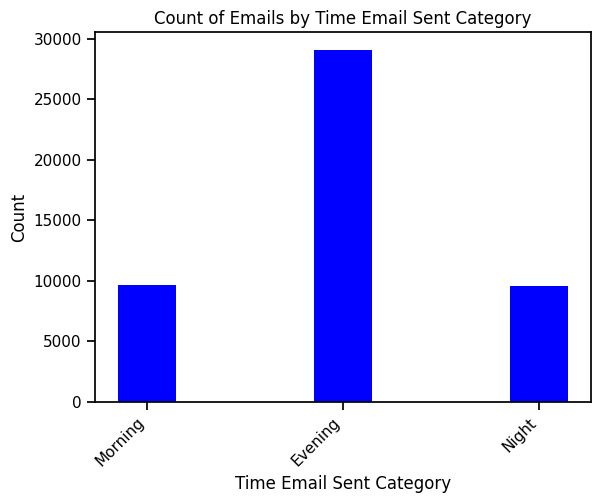

In [343]:
# Chart - 5 Count of Emails by Time Email Sent Category

p = df.groupby("Time_Email_sent_Category").size().reset_index(name='Count')
p
# Assuming p_df is your DataFrame
plt.bar(p['Time_Email_sent_Category'], p['Count'], width=0.3,color="blue")  # Adjust the width as needed

# Adding labels and title
plt.xlabel('Time Email Sent Category')
plt.ylabel('Count')
plt.title('Count of Emails by Time Email Sent Category')

# Replace x-axis labels with desired labels
plt.xticks(p['Time_Email_sent_Category'], ['Morning',  'Evening', 'Night'])

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

For comapring the different parameters of the dataset bar chart is used which better visualise the result and easy for understanding.

##### 2. What is/are the insight(s) found from the chart?

The highest no of the mails send to the customers during evening time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights helps in creating a positive business impact.

#### Chart - 6

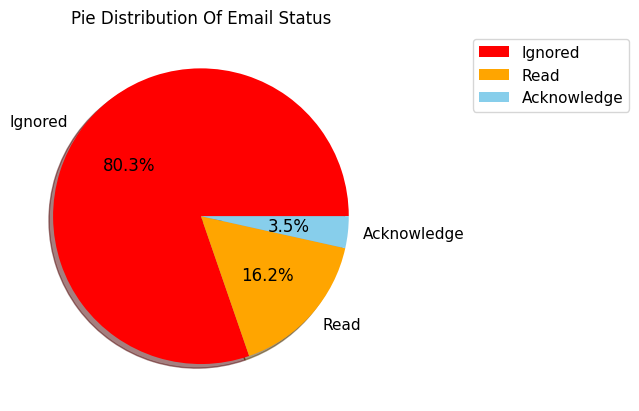

In [344]:
# Chart - 6 Pie Distribution Of Email Status
Email_Status_Pie_Chart=df["Email_Status"].value_counts()
labels=("Ignored","Read","Acknowledge")
plt.pie(Email_Status_Pie_Chart,labels=labels,autopct="%.1f%%",shadow=True, explode=[0,0,0],colors=["Red","Orange","skyblue"])
plt.title("Pie Distribution Of Email Status")
plt.legend(bbox_to_anchor=(0.9, 0, 0.78, 1))
plt.show()

##### 1. Why did you pick the specific chart?

For analysing the emails status type out of 100% pie chart is best suitable for such type of visualisation

##### 2. What is/are the insight(s) found from the chart?

From thise pie chart we know that the percentage of the email status.\
The percentage of Ignored are highest which is 80%. \
The percentage of mails which are read by user are 16% . \
The percentage of mails which are acknowledge by user are 4 %.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights helps in creating a positive business impact. From thise chart we know that percentage of emails which are opened, read and ackowledge by the user

#### Chart - 7

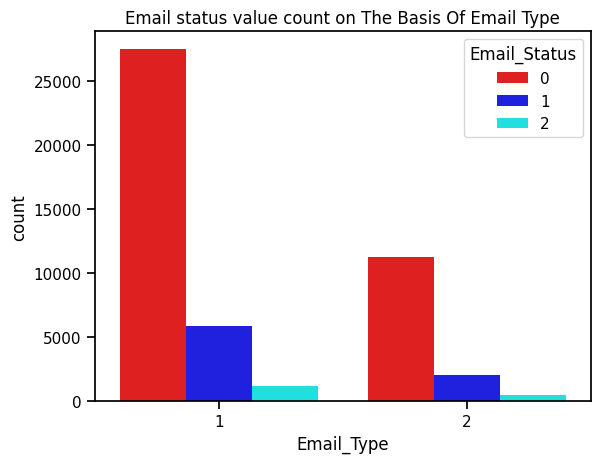

In [345]:
# Chart - 7 Email status value count on The Basis Of Email Type
custom_palette = ["Red", "Blue", "cyan"]

plt.title("Email status value count on The Basis Of Email Type")

# Make sure to use the correct column names in the plot
sns.barplot(data=Email_status_value_count_on_Email_Type, x="Email_Type", y="count", hue="Email_Status", palette=custom_palette)

plt.show()


##### 1. Why did you pick the specific chart?


For comapring the different parameters of the dataset bar chart is used which better visualise the result and easy for understanding.

##### 2. What is/are the insight(s) found from the chart?

As we are analysing the count of email status such as emails which are ignored,opened and acknowledge by the user with respect to the email type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights helps in creating a positive business impact. As we are analysing the count of  email status such as emails which are ignored,opened and acknowledge by the user with respect to the email type.

#### Chart - 8

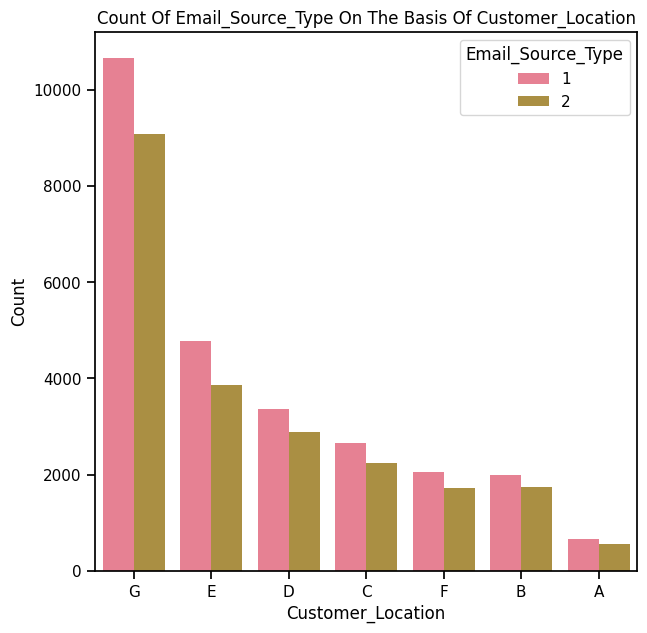

-----------------------------------------------------------------------------------------


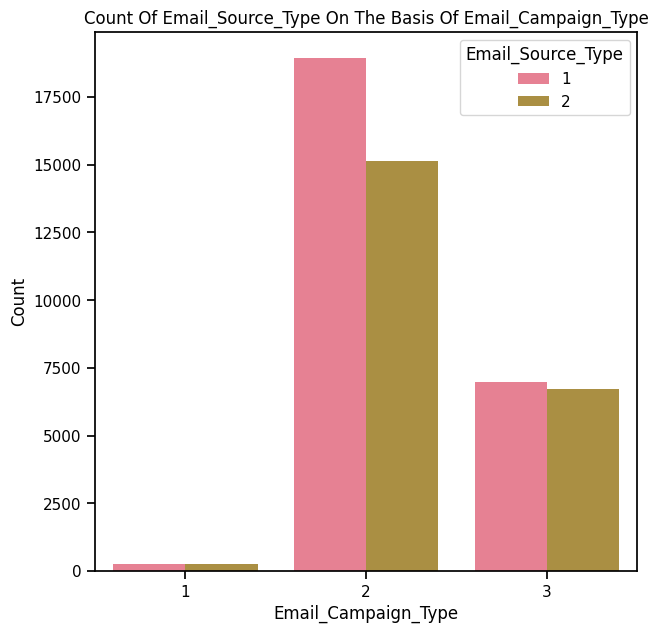

-----------------------------------------------------------------------------------------


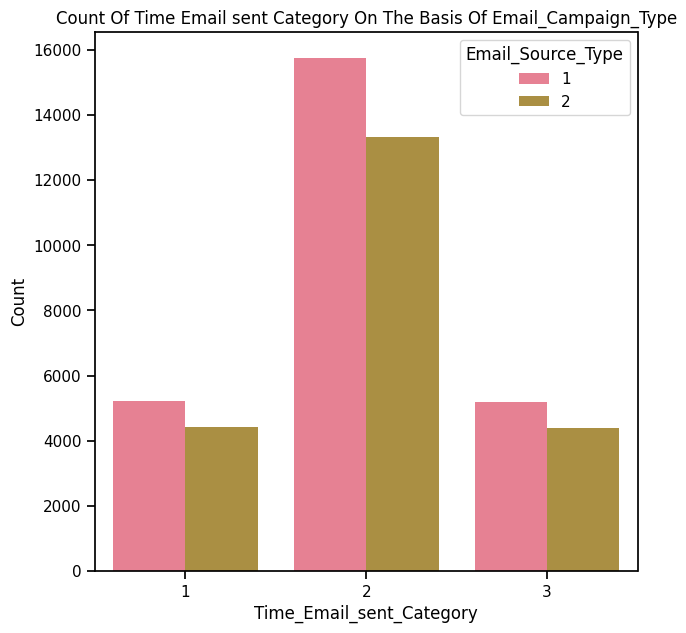

-----------------------------------------------------------------------------------------


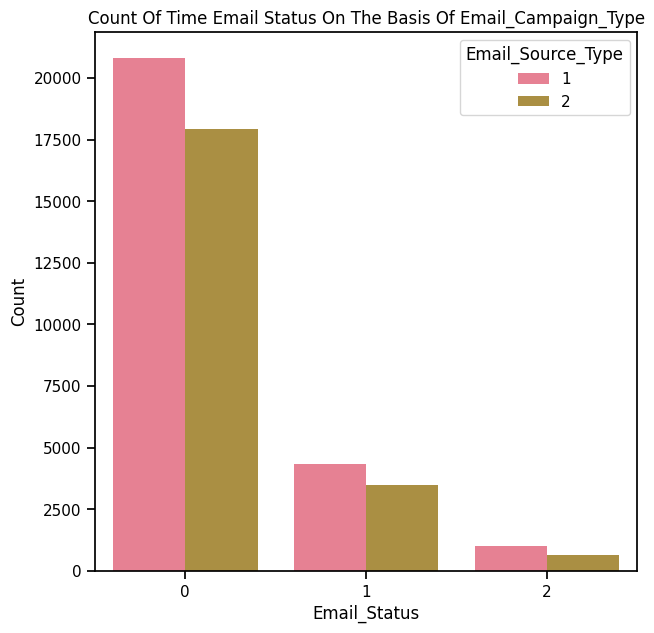

In [346]:
# Chart - 8 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined your DataFrame named Customer_Location_on_Email_Source_Type

# Get unique values in the 'Email_Source_Type' column
unique_email_source_types = Customer_Location_on_Email_Source_Type['Email_Source_Type'].unique()

# Define a custom color palette for Email_Source_Type
custom_palette = {email_source_type: sns.color_palette("husl")[i] for i, email_source_type in enumerate(unique_email_source_types)}

plt.figure(figsize=(7, 7))
plt.title("Count Of Email_Source_Type On The Basis Of Customer_Location")
ax = sns.barplot(data=Customer_Location_on_Email_Source_Type, x='Customer_Location', y="Count", hue='Email_Source_Type', palette=custom_palette)

plt.show()

print("-----------------------------------------------------------------------------------------")

plt.figure(figsize=(7, 7))
plt.title("Count Of Email_Source_Type On The Basis Of Email_Campaign_Type")
ax = sns.barplot(data=Email_Campaign_Type_on_Email_Source_Type, x='Email_Campaign_Type', y="Count", hue='Email_Source_Type', palette=custom_palette)
plt.show()


print("-----------------------------------------------------------------------------------------")

plt.figure(figsize=(7, 7))
plt.title("Count Of Time Email sent Category On The Basis Of Email_Campaign_Type")
ax = sns.barplot(data=Time_Email_sent_Category_on_Email_Source_Type, x='Time_Email_sent_Category', y="Count", hue='Email_Source_Type', palette=custom_palette)
plt.show()



print("-----------------------------------------------------------------------------------------")


plt.figure(figsize=(7, 7))
plt.title("Count Of Time Email Status On The Basis Of Email_Campaign_Type")
ax = sns.barplot(data=Email_Status_on_Email_Source_Type, x='Email_Status', y="Count", hue='Email_Source_Type', palette=custom_palette)
plt.show()



##### 1. Why did you pick the specific chart?


For comapring the different parameters of the dataset bar chart is used which better visualise the result and easy for understanding.

##### 2. What is/are the insight(s) found from the chart?

We are trying to find the correlation between different variables with respect to the Email Source Type

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights helps creating a positive business impact. Beacuse We are trying to find the correlation between different variables with respect to the Email Source Type.

#### Chart - 9

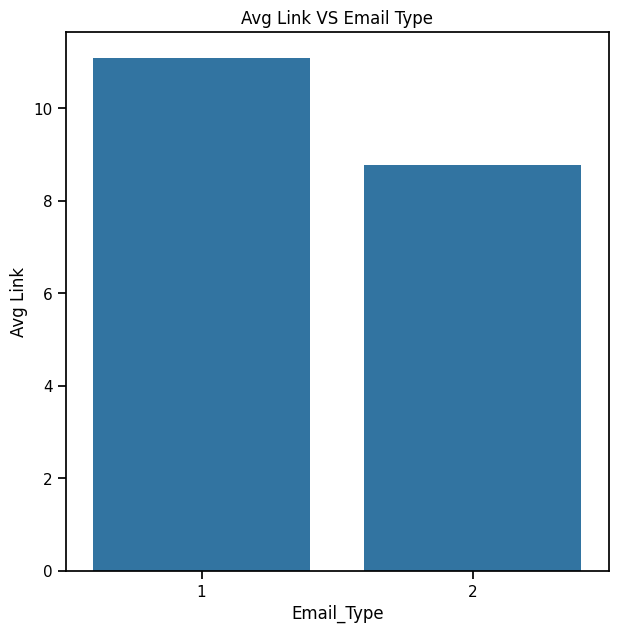

------------------------------------------------------------------


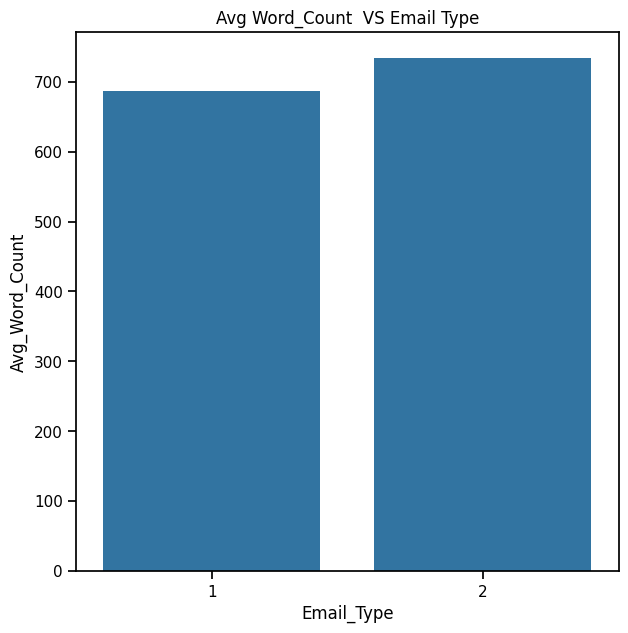

------------------------------------------------------------------


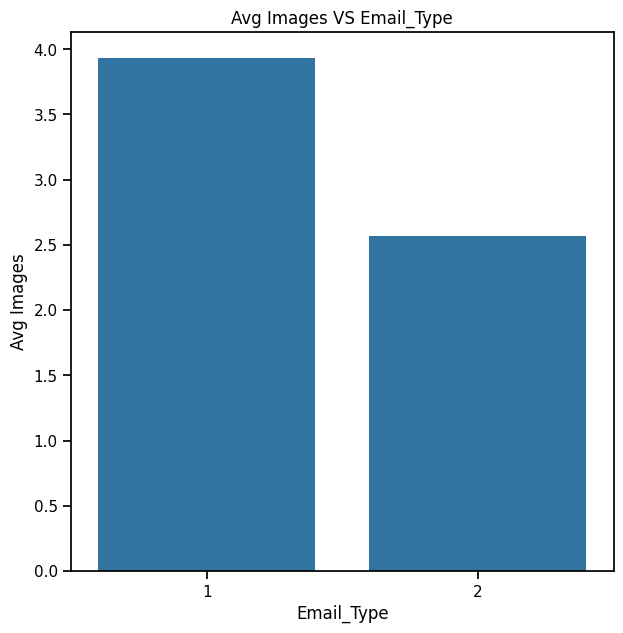

In [347]:
# Chart - 9 visualization code
plt.figure(figsize = (7,7))
plt.title("Avg Link VS Email Type")
ax = sns.barplot(data = Avg_Link, x = "Email_Type",y = "Avg Link")
plt.show()

print("------------------------------------------------------------------")

plt.figure(figsize = (7,7))
plt.title("Avg Word_Count  VS Email Type")
ax = sns.barplot(data = Avg_Word_Count, x = "Email_Type",y = "Avg_Word_Count")
plt.show()

print("------------------------------------------------------------------")

plt.figure(figsize = (7,7))
plt.title("Avg Images VS Email_Type")
ax = sns.barplot(data = Avg_Images, x = 'Email_Type',y = "Avg Images")
plt.show()


##### 1. Why did you pick the specific chart?


For comapring the different parameters of the dataset bar chart is used which better visualise the result and easy for understanding.

##### 2. What is/are the insight(s) found from the chart?

We are trying to find the correlation between different variables with respect to the Email Type

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights helps in creating a positive business impact. Becuase the correlation between different variables with respect to the Email Type helps in finding the relation and its effect on different variables

#### Chart - 10

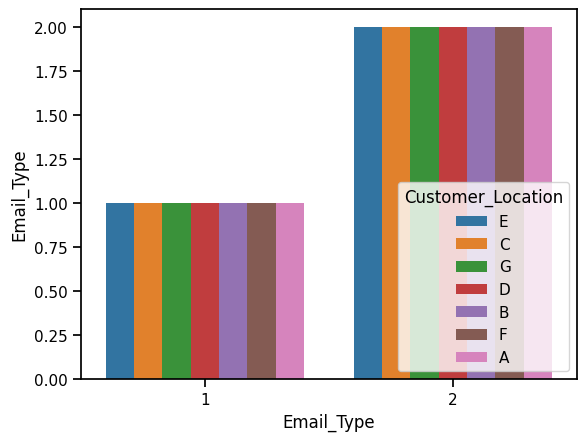

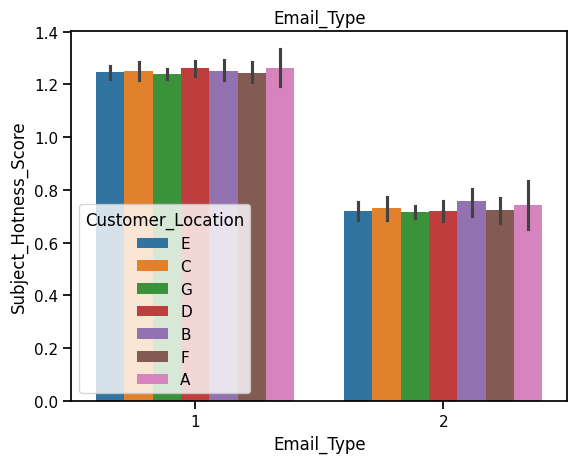

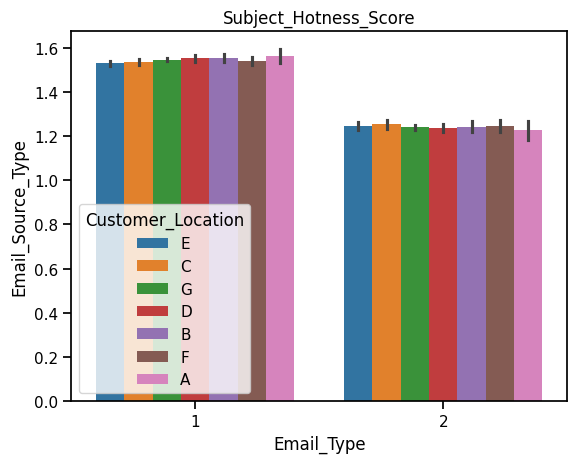

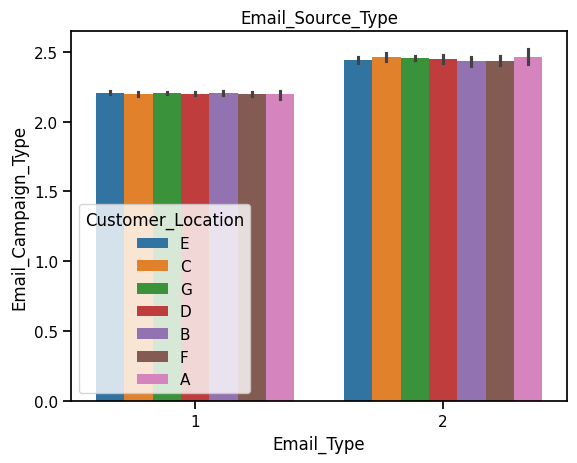

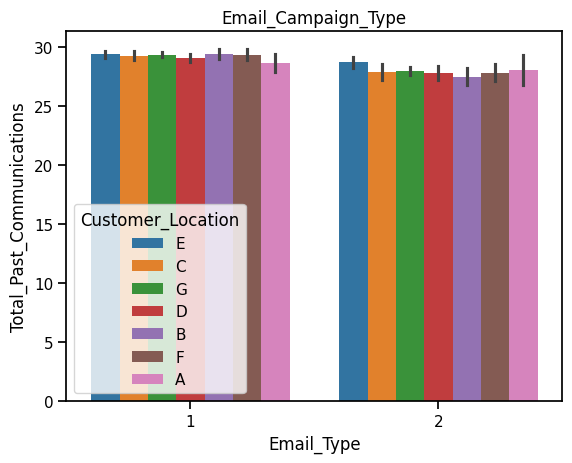

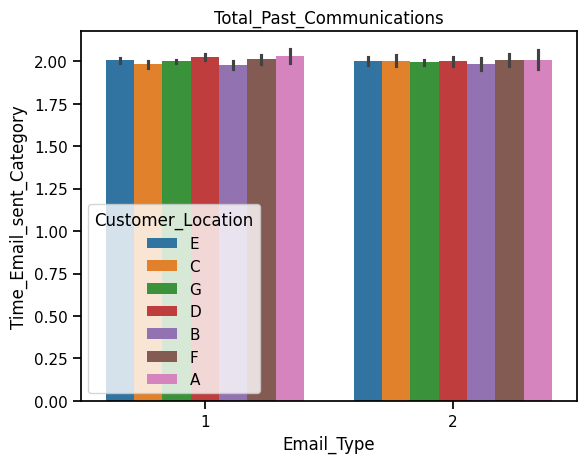

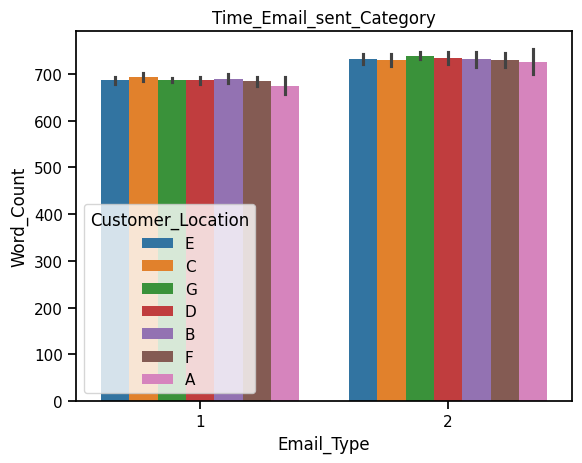

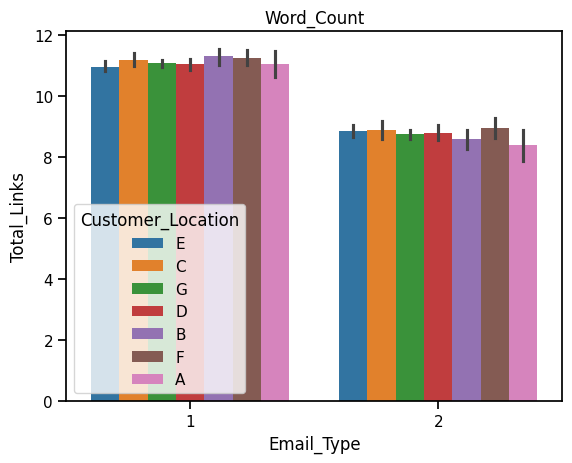

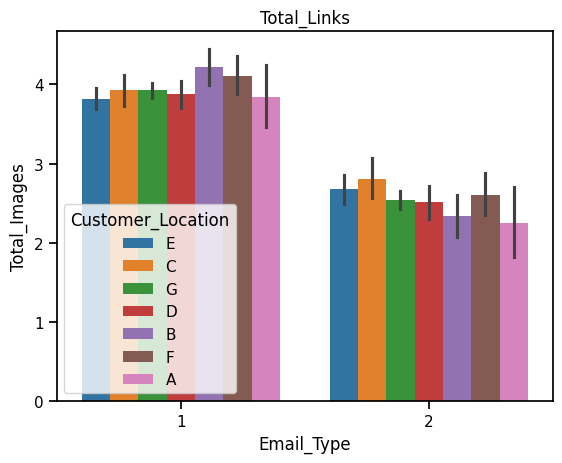

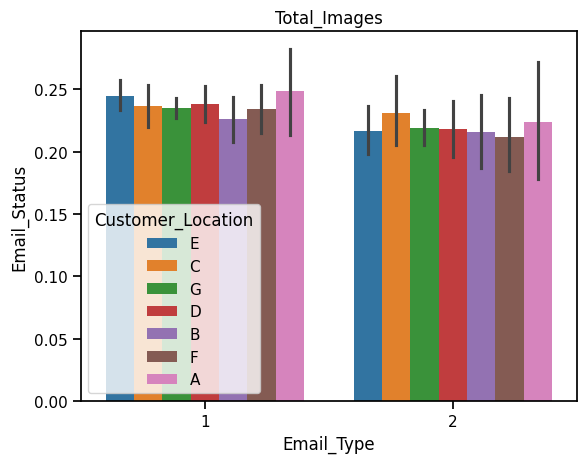

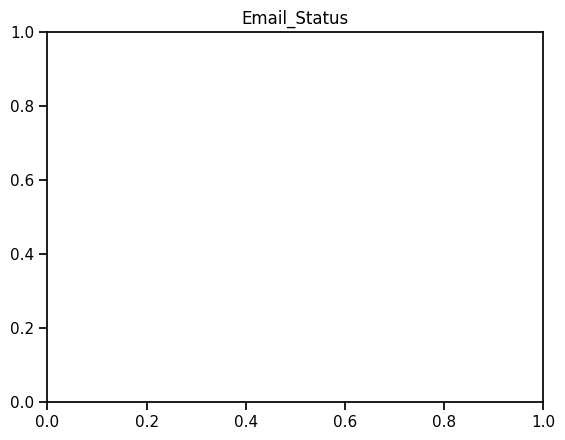

In [348]:
# Chart - 10 visualization code
for features in num_features:
  sns.barplot(data=df,x="Email_Type",y=features,hue="Customer_Location")
  plt.show()
  plt.title(features)


#### Chart - 11 - Correlation Heatmap

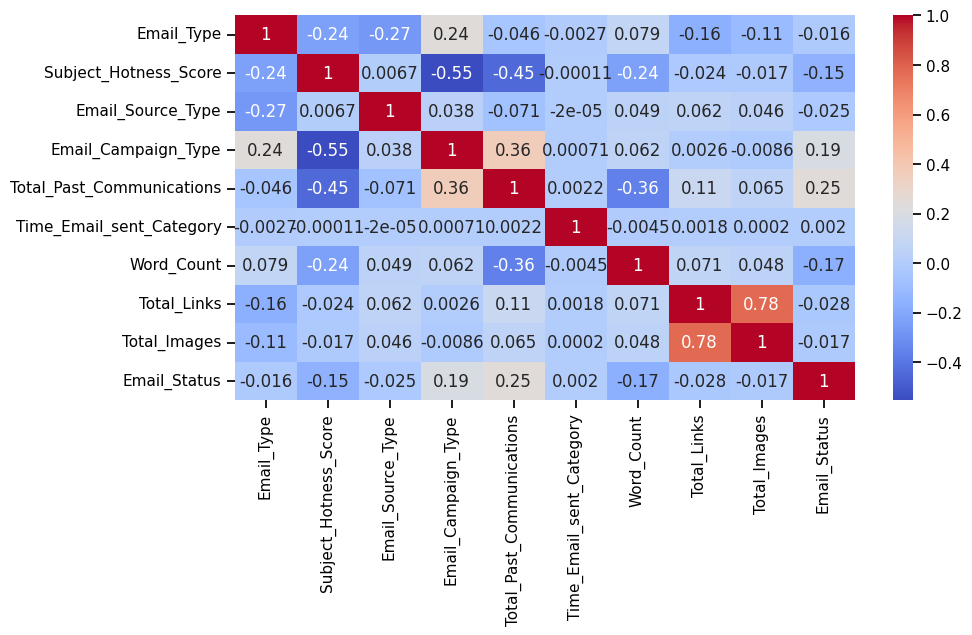

In [349]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10, 5))
sns.heatmap(data=df.corr(),annot=True,cmap="coolwarm")
plt.show()

##### 1. Why did you pick the specific chart?

For finding the relation between different different variables heatmap is used which best represents the relation between different variables

##### 2. What is/are the insight(s) found from the chart?

From thise heatmap we know that what is the actual relation between different variables of the datasets

#### Chart - 12 - Pair Plot

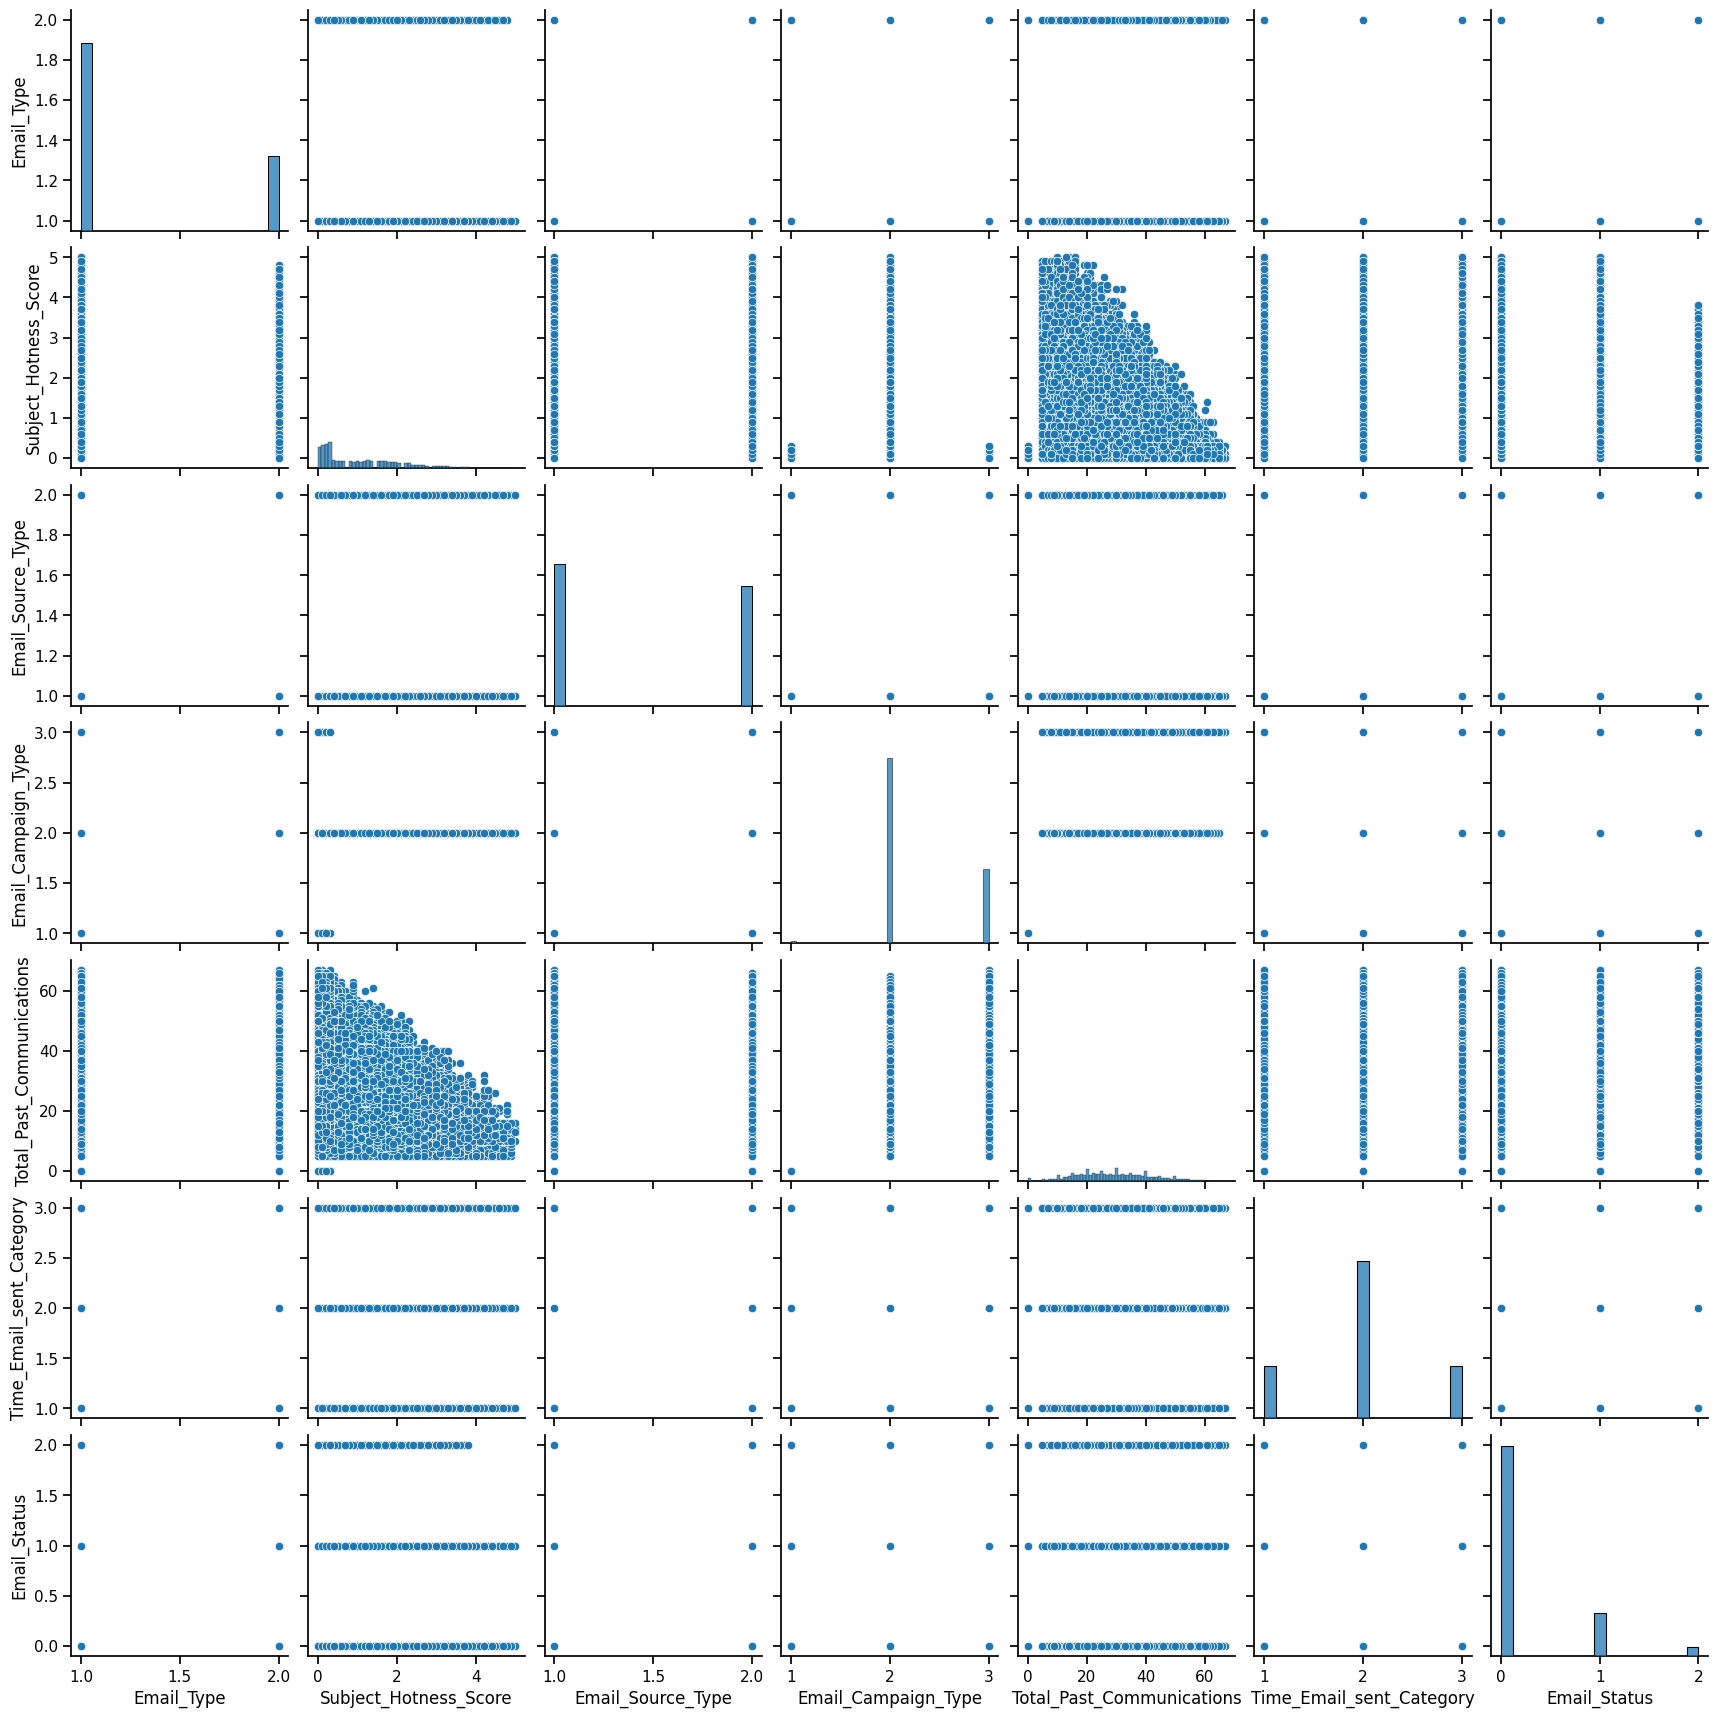

In [350]:
# Pair Plot visualization code
columns = ['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category','Email_Status']
data_for_pairplot = df[columns]

p = sns.pairplot(data_for_pairplot)
plt.show()

##### 1. Why did you pick the specific chart?


Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know, there are less linear relationship between variables and since most of them were categorial data with one or two category, it does not show much relationship.

Total links and total image show some linear relation and we already know they are correlated as seen in earlier heatmap.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* The Email_Type of the campaign will not have any significant impact on the Email_Status.
* The Subject_Hotness_Score of the email will not have any significant impact on the Total_Past_Communications.
* The Customer_Location will not have any significant impact on the Total_Links and Total_Images in the email.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no relationship between Email_Type and Email_Status (H0: B1 = 0)
* Alternative Hypothesis: There is a relationship between Email_Type and Email_Status (H1: B1 ≠ 0)
* Test Type : chi-square test

#### 2. Perform an appropriate statistical test.

In [351]:
# Perform Statistical Test to obtain P-Value

# perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['Email_Type'], df['Email_Status']))

if p_value < 0.05:
    print("Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status")
else:
    print("Fail to reject the null hypothesis - the Email_Type does not have a significant impact on the Email_Status")

Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status


##### Which statistical test have you done to obtain P-Value?

For this hypothesis, I used chi-square test of independence which is a statistical test to determine if there is a significant association between two categorical variables. In this case, the two variables are Email_Type and Email_Status.

##### Why did you choose the specific statistical test?

This test is appropriate because the variables are categorical and I want to determine if there is a relationship between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no linear relationship between Subject_Hotness_Score and Total_Past_Communications (H0: ρ = 0)
* Alternative Hypothesis: There is a linear relationship between Subject_Hotness_Score and Total_Past_Communications (H1: ρ ≠ 0)
* Test Type : Pearson's correlation test

#### 2. Perform an appropriate statistical test.

In [352]:
#to perform the test, variable I used has null or infinity values, therefore creating copy and treating those
data = df.copy()
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.mean())

In [353]:
# Perform Statistical Test to obtain P-Value
# perform correlation test
r, p_value = stats.pearsonr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])

if p_value < 0.05:
    print("Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications")
else:
    print("Fail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications")


Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications


##### Which statistical test have you done to obtain P-Value?

For this hypothesis, I used Pearson's correlation test which measures the linear correlation between two continuous variables. In this case, the two variables are Subject_Hotness_Score and Total_Past_Communications.

##### Why did you choose the specific statistical test?

This test is appropriate because the variables are continuous and I want to determine if there is a linear relationship between them.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: The mean of Total_Links is equal among the location (A, B, C, D, E, F, G) (H0: μ1 = μ2 = μ3 = μ4 = μ5 = μ6 = μ7)
* Alternative Hypothesis: The mean of Total_Links is not equal among the location (A, B, C, D, E, F, G) (H1: at least one mean is different from the others)
* Test Type : ANOVA Test

#### 2. Perform an appropriate statistical test.

In [354]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(df[df['Customer_Location'] == 'A']['Total_Links'],
                                  df[df['Customer_Location'] == 'B']['Total_Links'],
                                  df[df['Customer_Location'] == 'C']['Total_Links'],
                                  df[df['Customer_Location'] == 'D']['Total_Links'],
                                  df[df['Customer_Location'] == 'E']['Total_Links'],
                                  df[df['Customer_Location'] == 'F']['Total_Links'],
                                  df[df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


In [355]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(df[df['Customer_Location'] == 'A']['Total_Images'],
                                  df[df['Customer_Location'] == 'B']['Total_Images'],
                                  df[df['Customer_Location'] == 'C']['Total_Images'],
                                  df[df['Customer_Location'] == 'D']['Total_Images'],
                                  df[df['Customer_Location'] == 'E']['Total_Images'],
                                  df[df['Customer_Location'] == 'F']['Total_Images'],
                                  df[df['Customer_Location'] == 'G']['Total_Images'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Images in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Images in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Images in the email


In [356]:
# perform Kruskal-Wallis test
stat, p_value = stats.kruskal(df[df['Customer_Location'] == 'A']['Total_Links'],
                              df[df['Customer_Location'] == 'B']['Total_Links'],
                              df[df['Customer_Location'] == 'C']['Total_Links'],
                              df[df['Customer_Location'] == 'D']['Total_Links'],
                              df[df['Customer_Location'] == 'E']['Total_Links'],
                              df[df['Customer_Location'] == 'F']['Total_Links'],
                              df[df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


##### Which statistical test have you done to obtain P-Value?

For this hypothesis, I used ANOVA (Analysis of Variance) test because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups.

##### Why did you choose the specific statistical test?

This test is used to determine if there are significant differences between the means of two or more groups. In this case, we have different locations (A,B,C,D,E,F,G) and we want to determine if there is a significant difference in the mean of Total_Links among these groups. ANOVA is appropriate for this case because the variable Total_Links is continuous and we want to compare the means of multiple groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [357]:
# Handling Missing Values & Missing Value Imputation
df.dropna().inplace=True
df.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Here not using any missing value imputation techniques.Becuase any imputation technique can influence the data towards a specific variables which drops down the accuracy of the ml model and it performs poorly. we are deleting all the null values and making our dataset completely perfect for ml model creation.

### 2. Handling Outliers

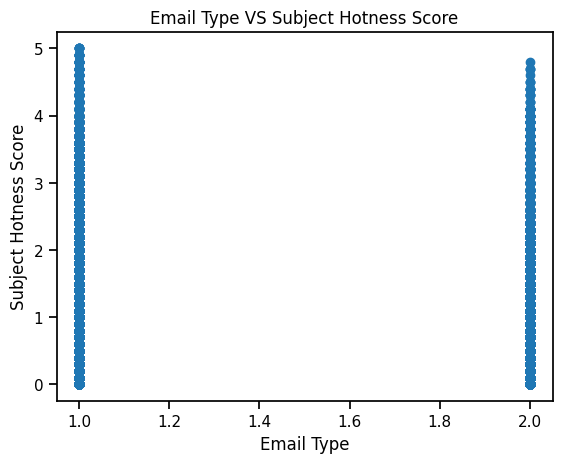

In [358]:
plt.scatter(df1["Email_Type"],df1["Subject_Hotness_Score"])
plt.xlabel("Email Type")
plt.ylabel("Subject Hotness Score")
plt.title("Email Type VS Subject Hotness Score")
plt.show()

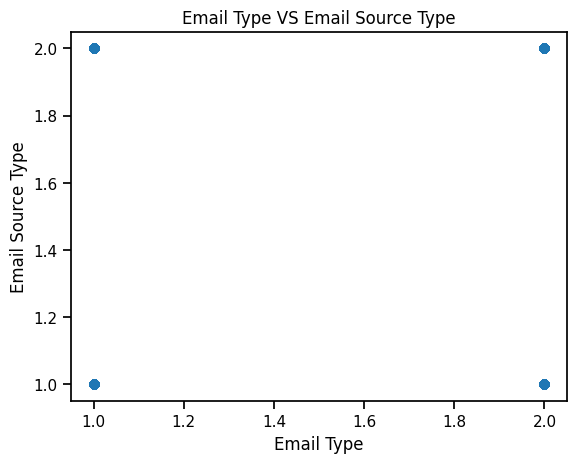

In [359]:
plt.scatter(df1["Email_Type"],df1["Email_Source_Type"])
plt.xlabel("Email Type")
plt.ylabel("Email Source Type")
plt.title("Email Type VS Email Source Type")
plt.show()

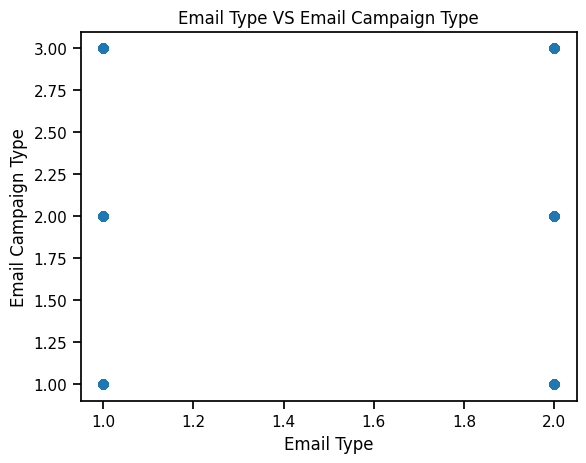

In [360]:
plt.scatter(df1["Email_Type"],df1["Email_Campaign_Type"])
plt.xlabel("Email Type")
plt.ylabel("Email Campaign Type")
plt.title("Email Type VS Email Campaign Type")
plt.show()

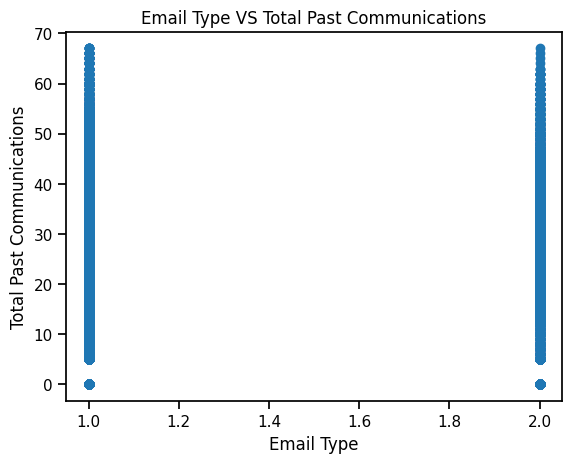

In [361]:
plt.scatter(df1["Email_Type"],df1["Total_Past_Communications"])
plt.xlabel("Email Type")
plt.ylabel("Total Past Communications")
plt.title("Email Type VS Total Past Communications")
plt.show()

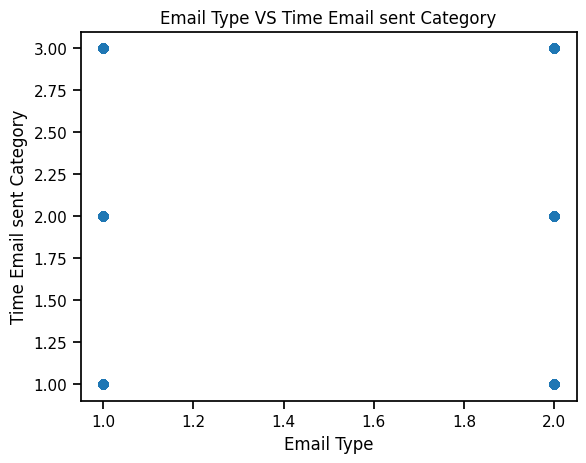

In [362]:
plt.scatter(df1["Email_Type"],df1["Time_Email_sent_Category"])
plt.xlabel("Email Type")
plt.ylabel("Time Email sent Category")
plt.title("Email Type VS Time Email sent Category")
plt.show()

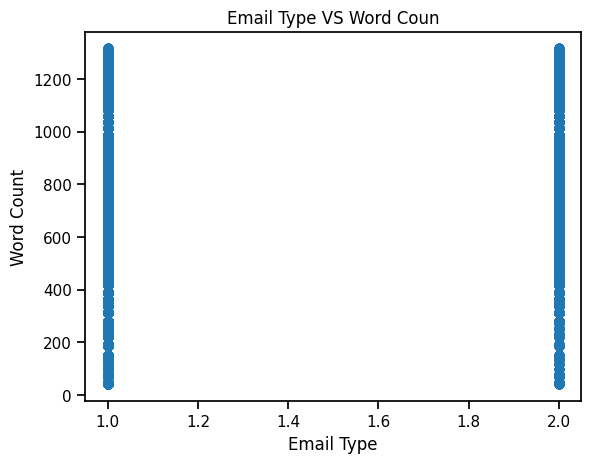

In [363]:
plt.scatter(df1["Email_Type"],df1["Word_Count"])
plt.xlabel("Email Type")
plt.ylabel("Word Count")
plt.title("Email Type VS Word Coun")
plt.show()

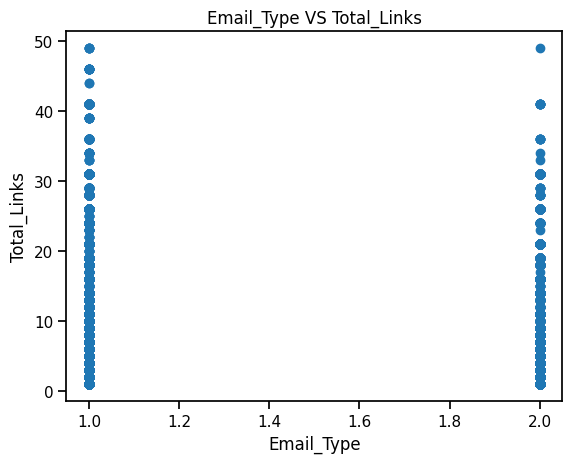

In [364]:
plt.scatter(df1["Email_Type"],df1["Total_Links"])
plt.xlabel("Email_Type")
plt.ylabel("Total_Links")
plt.title("Email_Type VS Total_Links")
plt.show()

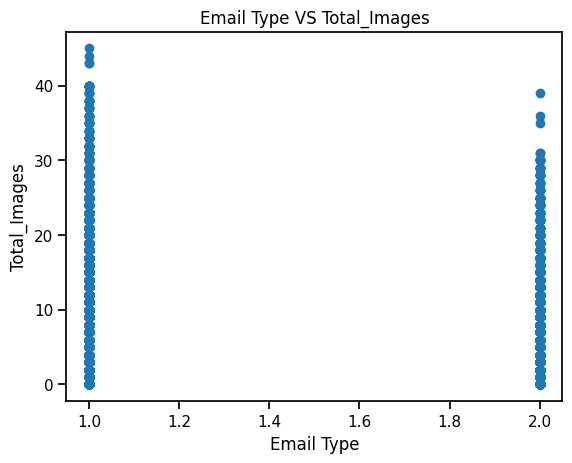

In [365]:
plt.scatter(df1["Email_Type"],df1["Total_Images"])
plt.xlabel("Email Type")
plt.ylabel("Total_Images")
plt.title("Email Type VS Total_Images")
plt.show()

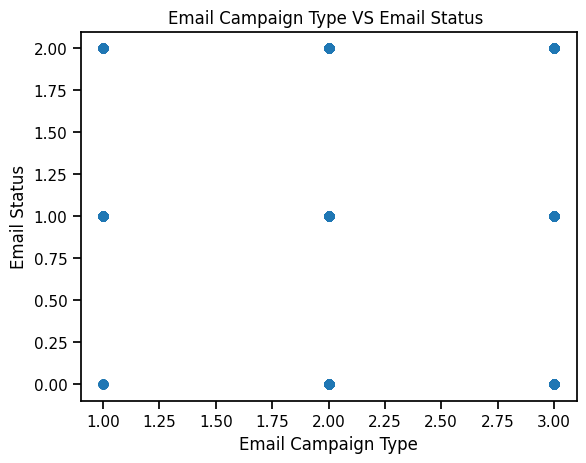

In [366]:
plt.scatter(df1["Email_Campaign_Type"],df1["Email_Status"])
plt.xlabel("Email Campaign Type")
plt.ylabel("Email Status")
plt.title("Email Campaign Type VS Email Status ")
plt.show()

In [367]:
# Handling Outliers & Outlier treatments in Email_Type
mean=df1["Email_Type"].mean()
std=df1["Email_Type"].std()
outlier=mean + 2 * std
df1[df1["Email_Type"]>outlier]

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status


In [368]:
# Handling Outliers & Outlier treatments in Email_Source_Type
mean=df1["Email_Source_Type"].mean()
std=df1["Email_Source_Type"].std()
outlier=mean + 2 * std
df1[df1["Email_Source_Type"]>outlier]

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status


In [369]:
# Handling Outliers & Outlier treatments In Email_Campaign_Type
mean=df1["Email_Campaign_Type"].mean()
std=df1["Email_Campaign_Type"].std()
outlier=mean + 2 * std
df1[df1["Email_Campaign_Type"]>outlier]

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status


In [370]:
# Handling Outliers & Outlier treatments In Time_Email_sent_Category
mean=df1["Time_Email_sent_Category"].mean()
std=df1["Time_Email_sent_Category"].std()
outlier=mean + 2 * std
df1[df1["Time_Email_sent_Category"]>outlier]

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status


##### What all outlier treatment techniques have you used and why did you use those techniques?

There Are No Any Outliers In Email Campaign Effectiveness Predidiction Dataset

### 3. Categorical Encoding

In [371]:
# Encode your categorical columns
#Converting Total_Past_Communications datatype from float to int
df["Total_Past_Communications"]=df["Total_Past_Communications"].astype("int")

#Converting Total_Links datatype from float to int
df["Total_Links"]=df["Total_Links"].astype("int")

#Converting Total_Links datatype from float to int
df["Total_Images"]=df["Total_Images"].astype("int")

#### What all categorical encoding techniques have you used & why did you use those techniques?

Convered "Float" Data Type Of Column Variable Name "Total_Past_Communications", "Total_Links", "Total_Images" To "Int" Data Type

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [372]:
# Expand Contraction

#### 2. Lower Casing

In [373]:
# Lower Casing

#### 3. Removing Punctuations

In [374]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [375]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [376]:
# Remove Stopwords

In [377]:
# Remove White spaces

#### 6. Rephrase Text

In [378]:
# Rephrase Text

#### 7. Tokenization

In [379]:
# Tokenization

#### 8. Text Normalization

In [380]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [381]:
# POS Taging

#### 10. Text Vectorization

In [382]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [383]:
# Manipulate Features to minimize feature correlation and create new features
#Total_Image_link
df["Total_Image_link"]=df["Total_Links"]+df["Total_Images"]


In [384]:
#Avg Word count per image and link
df["Avg Word count per image and link"]=(df["Total_Image_link"]/df["Word_Count"]) * 100

In [385]:
#Word Per Link
df["Word Per Link"]=(df["Total_Links"]/df["Word_Count"])

In [386]:
#Word Per Image
df["Word Per Image"]=(df["Total_Images"]/df["Word_Count"])

#### 2. Feature Selection

In [387]:
# Dropping Constant and Quasi Constant Feature
def dropping_constant(data):
  from  sklearn.feature_selection import VarianceThreshold
  var_thres= VarianceThreshold(threshold=0.05)
  var_thres.fit(data)
  concol = [column for column in data.columns
          if column not in data.columns[var_thres.get_support()]]
          #var_thres.get_support() return boolean values on checking condition
  if "Email_Status" in concol:
    concol.remove("Email_Status")
  else:
    pass
  print(f'Columns dropped: {concol}')
  df_removed_var=data.drop(concol,axis=1)
  return df_removed_var

In [388]:
x=df1.drop("Email_Status",axis=1)

In [389]:
# Calling the function
df_removed_var=dropping_constant(x)

Columns dropped: []


In [390]:
#correlation matrix

corr = df_removed_var.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images
Email_Type,1.00,-0.24,-0.27,0.24,-0.05,-0.00,0.08,-0.16,-0.11
Subject_Hotness_Score,-0.24,1.00,0.01,-0.55,-0.45,-0.00,-0.24,-0.02,-0.02
Email_Source_Type,-0.27,0.01,1.00,0.04,-0.07,-0.00,0.05,0.06,0.05
Email_Campaign_Type,0.24,-0.55,0.04,1.00,0.36,0.00,0.06,0.00,-0.01
Total_Past_Communications,-0.05,-0.45,-0.07,0.36,1.00,0.00,-0.36,0.11,0.06
Time_Email_sent_Category,-0.00,-0.00,-0.00,0.00,0.00,1.00,-0.00,0.00,0.00
Word_Count,0.08,-0.24,0.05,0.06,-0.36,-0.00,1.00,0.07,0.05
Total_Links,-0.16,-0.02,0.06,0.00,0.11,0.00,0.07,1.00,0.78
Total_Images,-0.11,-0.02,0.05,-0.01,0.06,0.00,0.05,0.78,1.00


In [391]:
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [392]:
# Checking Variable Inflation Factor
# the independent variables set
X = df_removed_var.copy()

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

for i in range(len(vif_data)):
  vif_data.loc[i,"VIF"]=vif_data.loc[i,"VIF"].round(2)
  if vif_data.loc[i,"VIF"]>=8:
    print(vif_data.loc[i,"feature"])

Email_Type
Email_Source_Type
Email_Campaign_Type
Total_Past_Communications
Time_Email_sent_Category
Word_Count
Total_Links


In [393]:
# Check Feature Correlation and finding multicolinearity
def correlation(df,threshold):
  col_corr=set()
  corr_matrix= df.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs (corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return list(col_corr)

In [394]:
correlation(df_removed_var,0.6)

['Total_Images']

In [395]:
#dropping highly correlated values
df_removed=df_removed_var.drop(['Email_Source_Type'],axis=1)
df_removed.shape

(48291, 8)

In [396]:
# Again checking VIF post-dropped features
# the independent variables set
X = df_removed.copy()

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data["VIF"] = vif_data["VIF"].apply(lambda x: round(x, 2))
vif_data[vif_data["VIF"] >= 8]["feature"].apply(print)

Email_Type
Email_Campaign_Type
Total_Past_Communications
Time_Email_sent_Category
Word_Count
Total_Links


0    None
2    None
3    None
4    None
5    None
6    None
Name: feature, dtype: object

In [397]:
calc_vif(df_removed[[i for i in df_removed.describe().columns if i not in ['Email_Status']]])

,variables,VIF
0,Email_Type,9.289370
1,Subject_Hotness_Score,2.182969
2,Email_Campaign_Type,26.170252
3,Total_Past_Communications,9.102725
4,Time_Email_sent_Category,9.954838
5,Word_Count,8.270509
6,Total_Links,9.648447
7,Total_Images,3.597387


##### What all feature selection methods have you used  and why?

I used Dropping Constant Feature, Dropping columns having multicolinearity and validate through VIF.

Feature Selector that removes all low variance features. This feature selection algorithm looks only at the features(X), not the desired outputs(Y), and can be used for unsupported learning.

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables The correlation coefficient has values between -1 to 1

• A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

• A value closer to 1 implies stronger positive correlation

• A value closer to -1 implies stronger negative correlation

Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. To detect collinearity among variables, simply create a correlation matrix and find variables with large absolute values.

Steps for Implementing VIF

• Calculate the VIF factors.

• Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

1st I dropped columns having constant or quasi constant variance. Then using pearson corelation I removed the columns having multicolinearity and again validate the VIFs for each feauture and found some features having VIF of more than 5-10 and I considered it to be 8 and again manipulated some features and again dropped multicolinear columns to make the VIF less than 8.

##### Which all features you found important and why?

In [398]:
#important features
df_removed.columns.to_list()

['Email_Type',
 'Subject_Hotness_Score',
 'Email_Campaign_Type',
 'Total_Past_Communications',
 'Time_Email_sent_Category',
 'Word_Count',
 'Total_Links',
 'Total_Images']

In [399]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=550)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  return final_df

In [400]:
# Getting feature importance of selected features
randomforest_embedded(x,y=df["Email_Status"])

,Features,Importances
0,Email_Type,0.015726
2,Email_Source_Type,0.027640
3,Email_Campaign_Type,0.040186
5,Time_Email_sent_Category,0.055036
8,Total_Images,0.105544
7,Total_Links,0.136999
1,Subject_Hotness_Score,0.143038
4,Total_Past_Communications,0.219308
6,Word_Count,0.256524


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [401]:
# Transform Your data
# Transform Your data
# Getting symmetric and skew symmetric features from the columns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Time_Email_sent_Category']
Skew Symmetric Distributed Features : - ['Email_Type', 'Subject_Hotness_Score', 'Email_Campaign_Type', 'Total_Past_Communications', 'Word_Count', 'Total_Links', 'Total_Images']


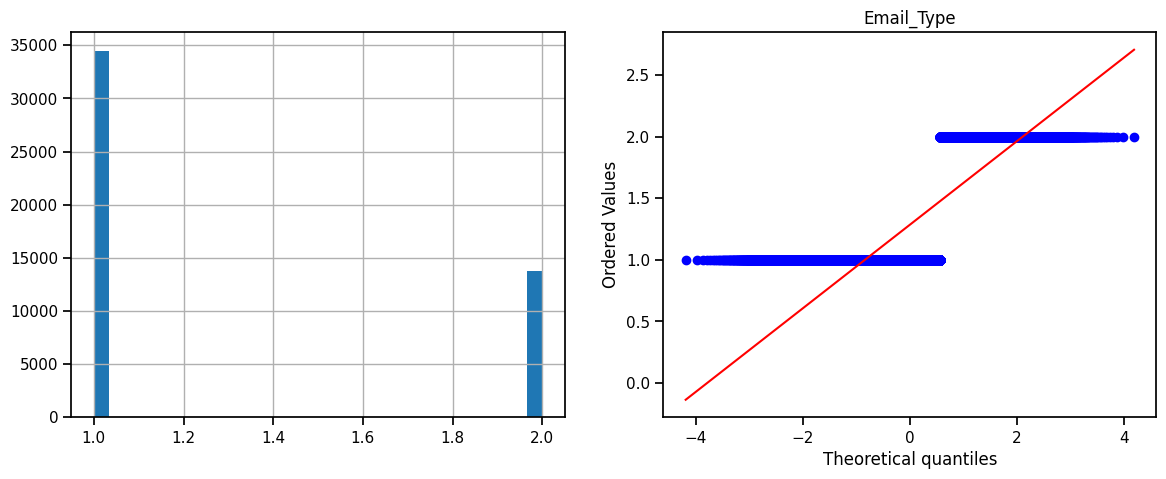

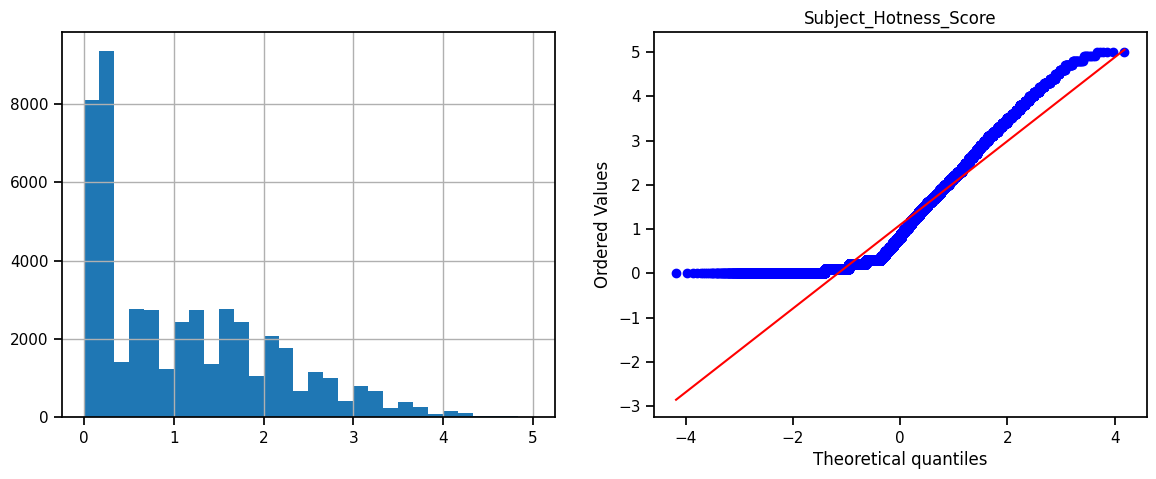

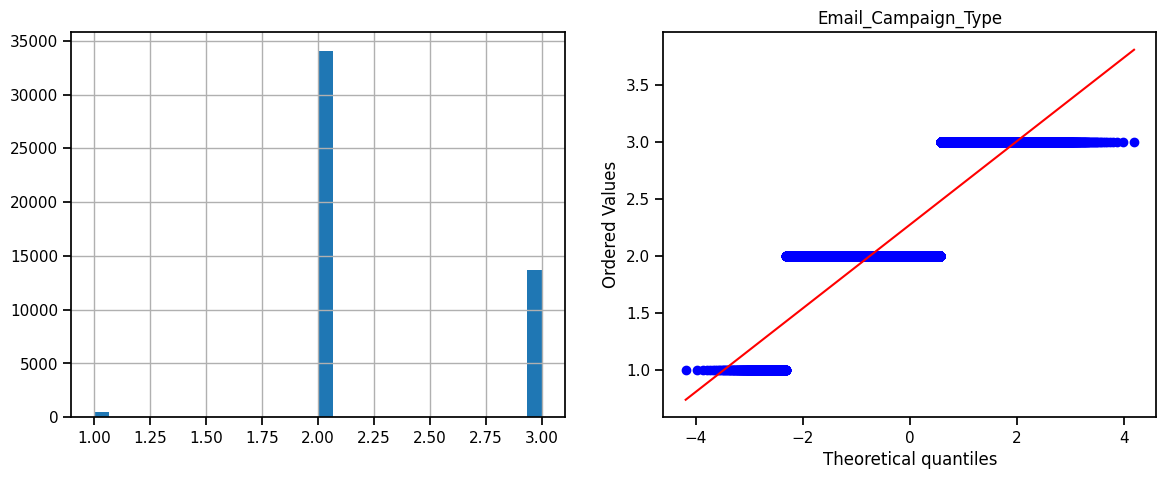

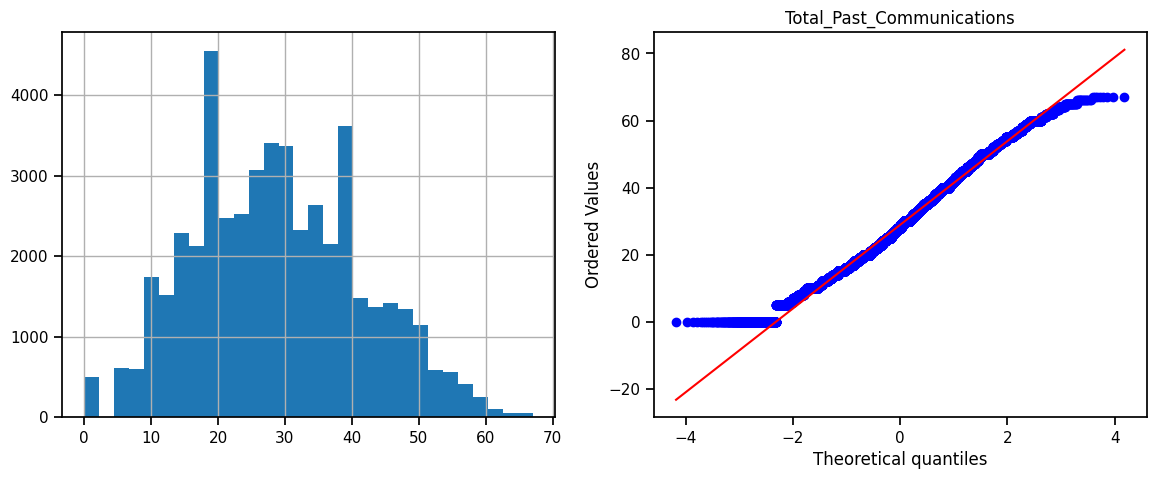

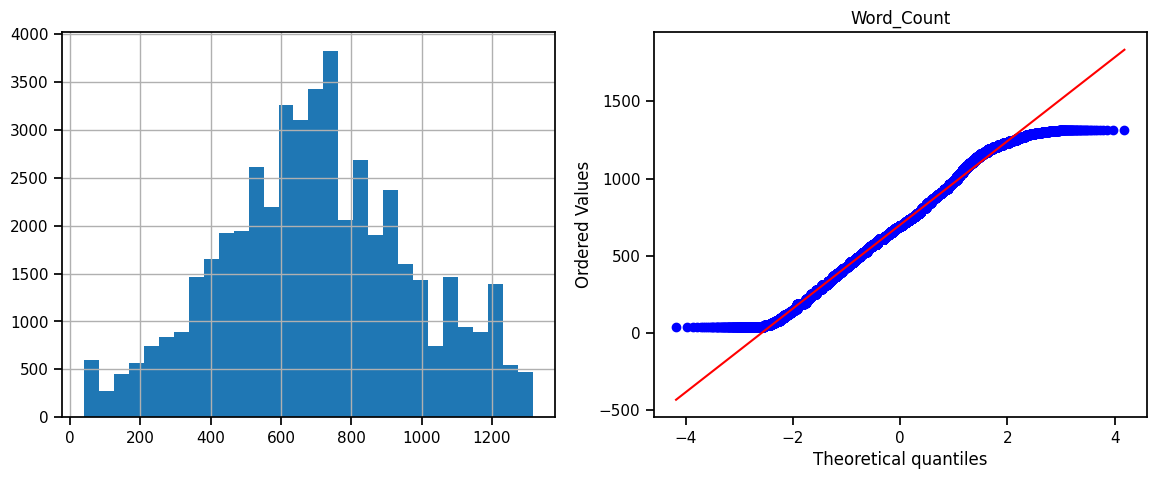

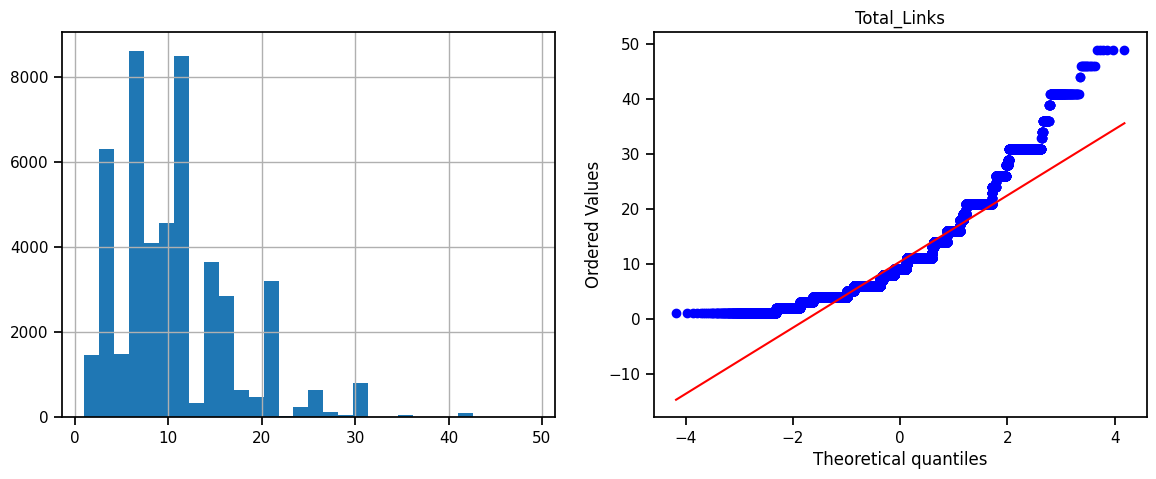

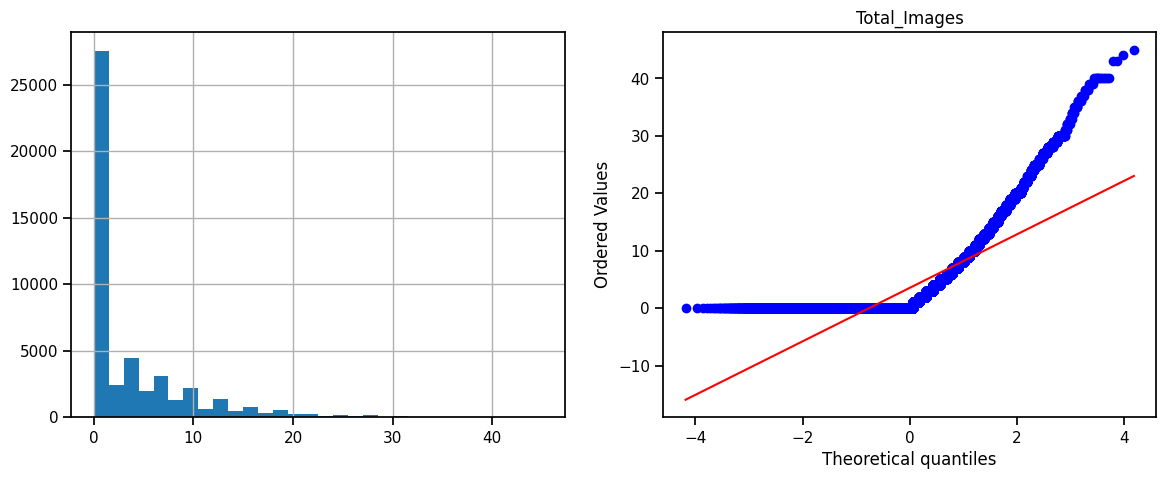

In [402]:
#vizualization
for variable in non_symmetric_feature:
  sns.set_context('notebook')
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  df_removed[variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df_removed[variable], dist='norm',plot=plt)
  plt.title(variable)
  plt.show()
  print('='*120)

In [403]:
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count']:
  df_removed[col]=np.sqrt(df_removed[col])

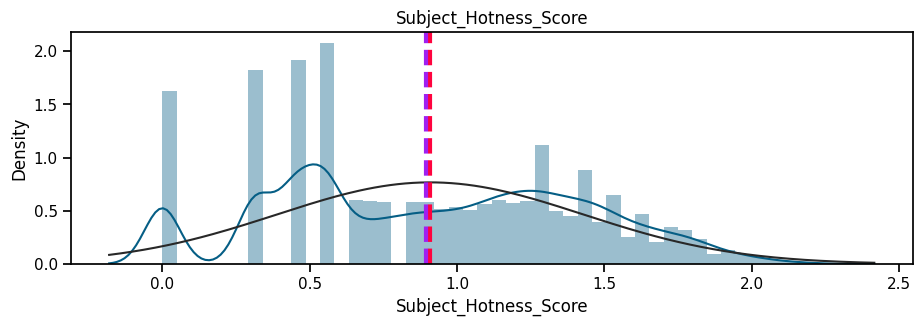

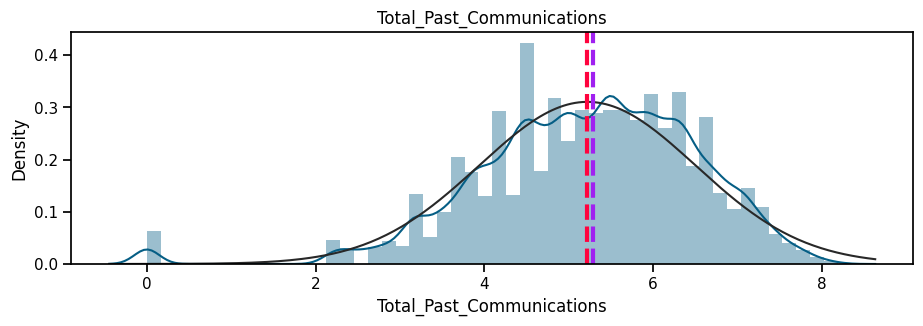

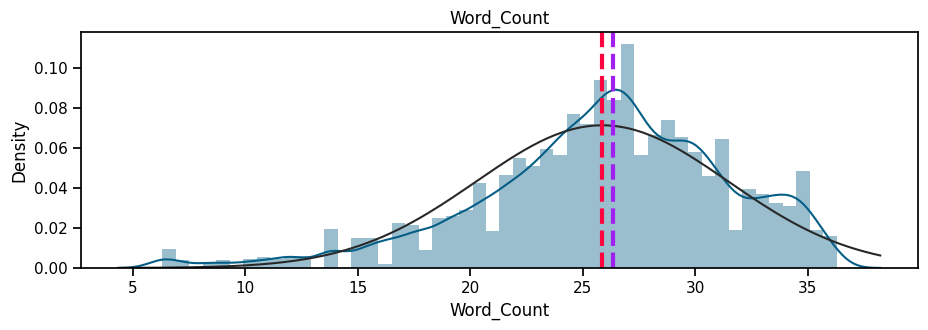

In [404]:
for i,col in enumerate(['Subject_Hotness_Score','Total_Past_Communications','Word_Count']) :
    plt.figure(figsize = (18,18))
    plt.subplot(6,2,i+1);
    sns.distplot(df_removed[col], color = '#055E85', fit = norm);
    feature = df_removed[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.title(f'{col.title()}');
    plt.tight_layout();

From the features, since some of them where having categorial feature therefore did not required transformation, for three features I have applied square root transformation to change it into gaussian normal distribution.

### 6. Data Scaling

In [405]:
# x=df1.drop("Email_Status",axis=1)
y=df1["Email_Status"]

In [406]:
# Scaling your data
#StandardScaler
standard_scaler=StandardScaler()
standard_scaler_scaled_data=standard_scaler.fit_transform(x)
standard_scaler_scaled_data


array([[-0.63202467,  1.10511906,  1.08781195, ..., -0.95775627,
        -0.38184034, -0.6342954 ],
       [ 1.58221672, -0.99909607, -0.91927653, ...,  0.96151061,
        -0.85143988, -0.6342954 ],
       [-0.63202467,  1.90672482,  1.08781195, ..., -0.33270767,
         0.87042509, -0.6342954 ],
       ...,
       [-0.63202467,  0.20331258, -0.91927653, ..., -0.17460714,
         3.21842278,  2.22789084],
       [-0.63202467, -0.69849391, -0.91927653, ...,  0.11953338,
         0.55735873,  0.08125116],
       [-0.63202467,  0.40371402, -0.91927653, ...,  1.24094411,
        -0.6949067 , -0.6342954 ]])

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

This dataset doesnot need any dimensionality reduction.

Dimensionality reduction is a technique that is used to reduce the number of features in a dataset. It is often used when the number of features is very large, as this can lead to problems such as overfitting and slow computation. There are a variety of techniques that can be used for dimensionality reduction, such as principal component analysis (PCA) and singular value decomposition (SVD).

There are several reasons why dimensionality reduction might be useful. One reason is that it can help to reduce the size of a dataset, which can be particularly useful when the dataset is very large. It can also help to improve the performance of machine learning models by reducing the number of features that the model has to consider, which can lead to faster computation and better generalization to new data.

Another reason to use dimensionality reduction is to reduce the curse of dimensionality, which refers to the fact that as the number of dimensions increases, the volume of the space increases exponentially. This can lead to problems such as the nearest neighbor search becoming less effective, as the distances between points become much larger. Dimensionality reduction can help to reduce the curse of dimensionality by reducing the number of dimensions in the data.

Finally, dimensionality reduction can also be useful for visualizing high-dimensional data. It can be difficult to visualize data in more than three dimensions, so reducing the number of dimensions can make it easier to understand the patterns in the data.

### 8. Data Splitting

In [407]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,x_test,y_train,y_test=train_test_split(standard_scaler_scaled_data,y,test_size=0.2,random_state=45)
print("The Shape Of X Train Dataset:",x_train.shape)
print("The Shape Of X Test Dataset:",x_test.shape)
print("The Shape Of y Train Dataset:",y_train.shape)
print("The Shape Of y Test Dataset:",y_test.shape)


The Shape Of X Train Dataset: (38632, 9)
The Shape Of X Test Dataset: (9659, 9)
The Shape Of y Train Dataset: (38632,)
The Shape Of y Test Dataset: (9659,)


##### What data splitting ratio have you used and why?

For ml model I am spliting data in 80:20 ratio.That means I am using 80% data for trainig the model and 20 % data for testing the model.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

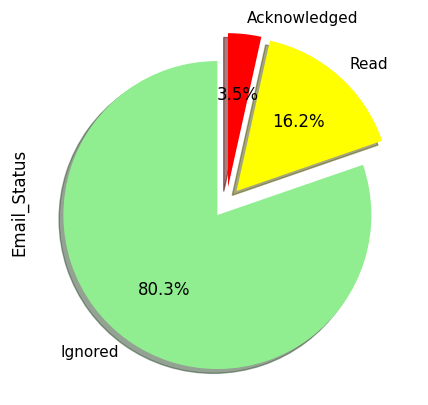

In [408]:
# Dependant Variable Column Visualization
df['Email_Status'].value_counts().plot(kind='pie',
                              figsize=(5,5),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Ignored','Read','Acknowledged'],
                               colors=['lightgreen','yellow','red'],
                               explode=[0.1,0.1,0.1]
                              );

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different: If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case the dataset dependent column data ratio is 80:16:4. So, during model creating it's obvious that there will be bias and having a great chance of predicting the majority one so frequently. SO the dataset should be balanced before it going for the model creation part.

In [409]:
df["Email_Status"].value_counts()

0    38772
1     7841
2     1678
Name: Email_Status, dtype: int64

In [410]:
print(x_train.shape)
print(y_train.shape)

(38632, 9)
(38632,)


In [411]:
# #SMOTE
# # Handaling imbalance dataset using SMOTE
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

# describes info about train and test set
print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (93084, 9)
Number transactions y_train dataset:  (93084,)
Number transactions X_test dataset:  (9659, 9)
Number transactions y_test dataset:  (9659,)


Class=0, n=31028 (33.333%)
Class=1, n=31028 (33.333%)
Class=2, n=31028 (33.333%)


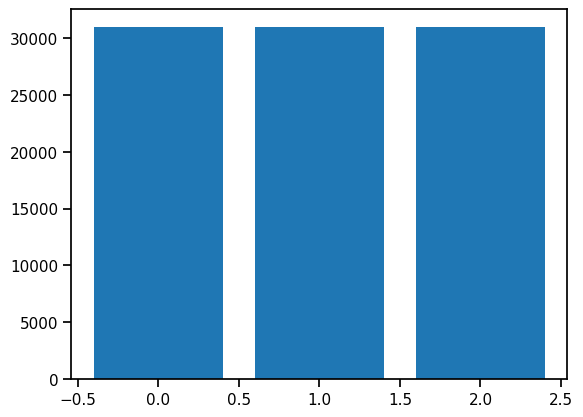

In [412]:
from collections import Counter
counter = Counter(y_train)
for key,value in counter.items():
  per = value / len(y_train) * 100
  print('Class=%d, n=%d (%.3f%%)' % (key, value, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE (Synthetic Minority Over-sampling technique) to balance the 80:16:4 dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE.

To address this disparity, balancing schemes that augment the data to make it more balanced before training the classifier were proposed. Oversampling the minority class by duplicating minority samples or undersampling the majority class is the simplest balancing method.

The idea of incorporating synthetic minority samples into tabular data was first proposed in SMOTE, where synthetic minority samples are generated by interpolating pairs of original minority points.

SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm.

SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

That's why for lots of advantages, I have used SMOTE technique for balancinmg the dataset.

## ***7. ML Model Implementation***

### ML Model - LogisticRegression

In [413]:
# ML Model - 1 Implementation
model1=LogisticRegression(fit_intercept=True,
            class_weight='balanced',multi_class='multinomial')
# Fit the Algorithm
model1.fit(x_train,y_train)
# Predict on the model

y_train_pred=model1.predict(x_train)
y_pred=model1.predict(x_test)

training_accuracy=accuracy_score(y_train_pred,y_train)

prediction_accuracy=accuracy_score(y_pred,y_test)


accuracy1=accuracy_score(y_test,y_pred)
precision1=precision_score(y_test,y_pred,average="weighted")
recall1=recall_score(y_test,y_pred,average="weighted")
f1=f1_score(y_test,y_pred,average="weighted")

In [414]:
print("Training Accuracy",training_accuracy * 100,"%")
print("Prediction Accuracy",prediction_accuracy * 100,"%")
print("Accuracy Of LogisticRegression Model Is: ",accuracy1)
print("Precision Of LogisticRegression Model Is: ",precision1)
print("Recall Of LogisticRegression Model Is: ",recall1)
print("F1 Score Of LogisticRegression Model Is: ",f1)

Training Accuracy 49.43277040092819 %
Prediction Accuracy 54.45698312454705 %
Accuracy Of LogisticRegression Model Is:  0.5445698312454705
Precision Of LogisticRegression Model Is:  0.757510952520623
Recall Of LogisticRegression Model Is:  0.5445698312454705
F1 Score Of LogisticRegression Model Is:  0.6210434210218452


In [415]:
# Get the predicted probabilities
train_pred=model1.predict_proba(x_train)
test_pred=model1.predict_proba(x_test)


In [416]:
# Get the predicted classes
train_class_pred=model1.predict(x_train)
test_class_pred=model1.predict(x_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[19022  3773  8233]
 [ 9529  5975 15524]
 [ 6403  3608 21017]]


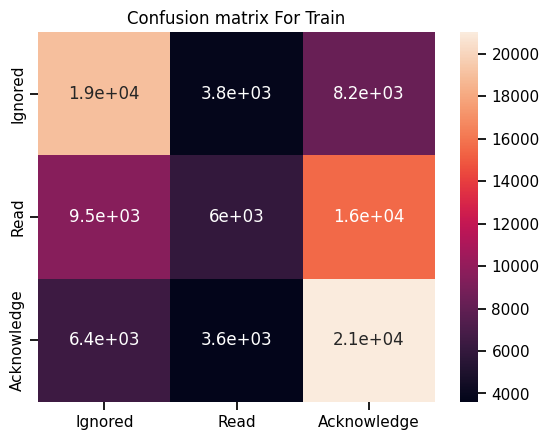

In [417]:
#confusion Matrix For Training
labels=["Ignored","Read","Acknowledge"]
cm=confusion_matrix(y_train,train_class_pred)
print(cm)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_title("Confusion matrix For Train")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

[[4710  959 2075]
 [ 499  326  754]
 [  75   37  224]]


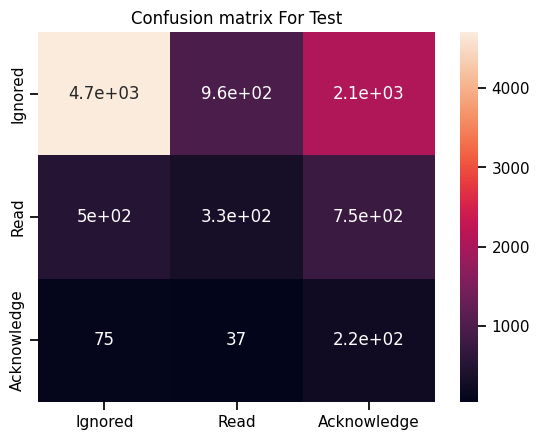

In [418]:
#confusion Matrix for Testing
labels=["Ignored","Read","Acknowledge"]
cm=confusion_matrix(y_test,test_class_pred)
print(cm)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_title("Confusion matrix For Test")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [419]:
# Initialize Stratified K-Fold Cross-Validation
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store the scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate over the folds
for train_index, val_index in skf.split(x, y):
    # Split the data into training and validation sets
    x_train, x_val = x.iloc[train_index], x.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model
    model2 = LogisticRegression()
    model2.fit(x_train, y_train)

    # Perform predictions on the validation set
    y_pred = model2.predict(x_val)

    # Calculate and append the scores
    accuracy_scores.append(accuracy_score(y_val, y_pred))
    precision_scores.append(precision_score(y_val, y_pred, average="weighted"))
    recall_scores.append(recall_score(y_val, y_pred, average="weighted"))
    f1_scores.append(f1_score(y_val, y_pred, average="weighted"))

# Print the average scores
print(f"Average Accuracy: {np.mean(accuracy_scores) * 100:.2f}%")
print(f"Average Precision: {np.mean(precision_scores):.2f}")
print(f"Average Recall: {np.mean(recall_scores):.2f}")
print(f"Average F1-Score: {np.mean(f1_scores):.2f}")

Average Accuracy: 80.29%
Average Precision: 0.72
Average Recall: 0.80
Average F1-Score: 0.73


In [420]:
# Predict on the model for train and test data
y_pred_train2 = model2.predict(x_train)
y_pred2 = model2.predict(x_test)

In [421]:
# Get the predicted probabilities
train_probability2 = model2.predict_proba(x_train)
test_probability2 = model2.predict_proba(x_test)

In [422]:
# Result for train
print("Classification Report (Train):\n", classification_report(y_train, y_pred_train2))
print("ROC AUC Score (Train):", roc_auc_score(y_train, train_probability2, multi_class='ovr'))
print()

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.81      0.99      0.89     31018
           1       0.42      0.04      0.08      6273
           2       0.00      0.00      0.00      1342

    accuracy                           0.80     38633
   macro avg       0.41      0.34      0.32     38633
weighted avg       0.72      0.80      0.73     38633

ROC AUC Score (Train): 0.6810871575694524



In [423]:
# Result for test
print("Classification Report (Test):\n", classification_report(y_test, y_pred2))
print("ROC AUC Score (Test):", roc_auc_score(y_test, test_probability2, multi_class='ovr'))


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.86      0.53      0.66      7744
           1       0.26      0.43      0.32      1579
           2       0.03      0.21      0.06       336

    accuracy                           0.50      9659
   macro avg       0.38      0.39      0.34      9659
weighted avg       0.73      0.50      0.58      9659

ROC AUC Score (Test): 0.6243740188218597


##### Which hyperparameter optimization technique have you used and why?

I have used Stratified KFold Cross validation technique for optimizing performans of the ml model. As in Stratified KFold Cross validation the proportion of different classes remains consistent across the training and validation sets and it gives better results in case of data inbalaced condition.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, I found precision of 81% and recall of 99% and f1-score of 89% for ignored emails. For class 2 i.e., email opened got precision of 42% and recall of 4% and f1-score of 8% and for class 3 i.e., email acknowledged got precision of 0% and recall of 0% and f1-score of 0% Accuracy is 80% and average precision, recall & f1_score are 41%, 34% and 32% respectively with a roc auc score of 68%.

For test dataset, I found precision of 86% and recall of 53% and f1-score of 66% for ignored emails. For class 2 i.e., email opened got precision of 26% and recall of 43% and f1-score of 32% and for class 3 i.e., email acknowledged got precision of 3% and recall of 21% and f1-score of 6% Accuracy is 50% and average precision, recall & f1_score are 38%, 39% and 34% respectively with a roc auc score of 62%.

### ML Model - RandomForestClassifier

In [424]:
# ML Model - 2 Implementation
model5=RandomForestClassifier()

# Fit the Algorithm
model5.fit(x_train,y_train)
# Predict on the model

y_train_pred=model5.predict(x_train)
y_pred=model5.predict(x_test)

training_accuracy5=accuracy_score(y_train_pred,y_train)
prediction_accuracy5=accuracy_score(y_test,y_pred)

accuracy5=accuracy_score(y_test,y_pred)
precision5=precision_score(y_test,y_pred,average="weighted")
recall5=recall_score(y_test,y_pred,average="weighted")
f5=f1_score(y_test,y_pred,average="weighted")

In [425]:
print("Training Accuracy:",training_accuracy5 * 100)
print("Prediction Accuracy",prediction_accuracy5 *100)
print("Accuracy Of  Model Is: ",accuracy5)
print("Precision Of  Model Is: ",precision5)
print("Recall Of  Model Is: ",recall5)
print("F1 Score Of  Model Is: ",f5)

Training Accuracy: 99.90163849558668
Prediction Accuracy 22.68350760948338
Accuracy Of  Model Is:  0.22683507609483383
Precision Of  Model Is:  0.6325295910972254
Recall Of  Model Is:  0.22683507609483383
F1 Score Of  Model Is:  0.21082699207536854


In [426]:
#Get Predicted Classes
train_class_pred22=model5.predict(x_train)
test_class_pred22=model5.predict(x_test)

In [427]:
# Get the predicted classes
train_class_pred22=model5.predict(x_train)
test_class_pred22=model5.predict(x_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[31008     8     2]
 [   19  6252     2]
 [    2     5  1335]]


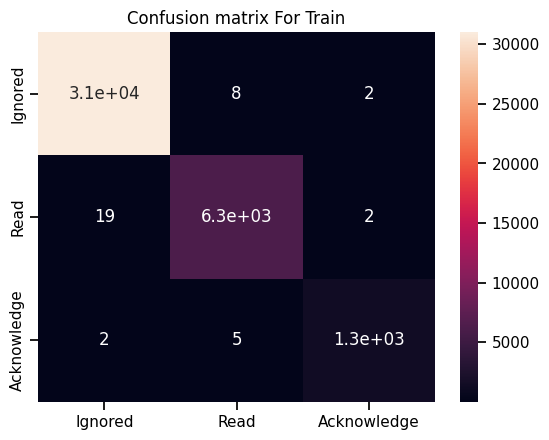

In [428]:
#confusion Matrix For Training
labels=["Ignored","Read","Acknowledge"]
cm=confusion_matrix(y_train,train_class_pred22)
print(cm)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_title("Confusion matrix For Train")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

[[ 925 6215  604]
 [ 230 1238  111]
 [  71  237   28]]


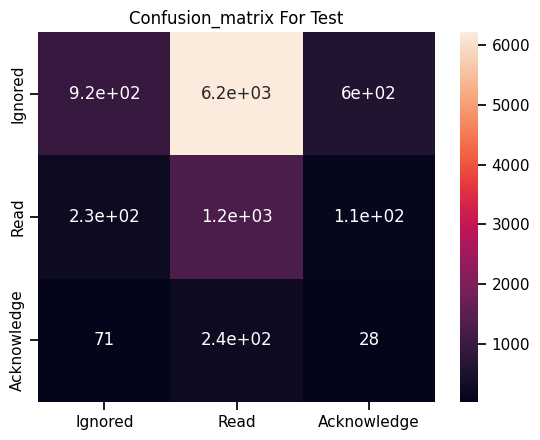

In [429]:
# Visualizing evaluation Metric Score chart
#confusion Matrix For Testing
labels=["Ignored","Read","Acknowledge"]
cm=confusion_matrix(y_test,test_class_pred22)
print(cm)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_title("Confusion_matrix For Test")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [430]:
# Initialize Stratified K-Fold Cross-Validation
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store the scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate over the folds
for train_index, val_index in skf.split(x, y):
    # Split the data into training and validation sets
    x_train, x_val = x.iloc[train_index], x.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model
    model5 = RandomForestClassifier()
    model5.fit(x_train, y_train)

    # Perform predictions on the validation set
    y_pred = model5.predict(x_val)

    # Calculate and append the scores
    accuracy_scores.append(accuracy_score(y_val, y_pred))
    precision_scores.append(precision_score(y_val, y_pred, average="weighted"))
    recall_scores.append(recall_score(y_val, y_pred, average="weighted"))
    f1_scores.append(f1_score(y_val, y_pred, average="weighted"))

# Print the average scores
print(f"Average Accuracy: {np.mean(accuracy_scores) * 100:.2f}%")
print(f"Average Precision: {np.mean(precision_scores):.2f}")
print(f"Average Recall: {np.mean(recall_scores):.2f}")
print(f"Average F1-Score: {np.mean(f1_scores):.2f}")

Average Accuracy: 80.09%
Average Precision: 0.74
Average Recall: 0.80
Average F1-Score: 0.76


In [431]:
# Predict on the model for train and test data
y_pred_train5 = model5.predict(x_train)
y_pred5 = model5.predict(x_test)

In [432]:
# Get the predicted probabilities
train_probability5 = model5.predict_proba(x_train)
test_probability5 = model5.predict_proba(x_test)

In [433]:
# Result for train
print("Classification Report (Train):\n", classification_report(y_train, y_pred_train5))
print("ROC AUC Score (Train):", roc_auc_score(y_train, train_probability5, multi_class='ovr'))
print()

Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31018
           1       1.00      1.00      1.00      6273
           2       1.00      0.99      1.00      1342

    accuracy                           1.00     38633
   macro avg       1.00      1.00      1.00     38633
weighted avg       1.00      1.00      1.00     38633

ROC AUC Score (Train): 0.9999968136194881



In [434]:
# Result for test
print("Classification Report (Test):\n", classification_report(y_test, y_pred5))
print("ROC AUC Score (Test):", roc_auc_score(y_test, test_probability5, multi_class='ovr'))


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.80      0.03      0.05      7744
           1       0.17      0.91      0.28      1579
           2       0.04      0.08      0.05       336

    accuracy                           0.17      9659
   macro avg       0.33      0.34      0.13      9659
weighted avg       0.67      0.17      0.09      9659

ROC AUC Score (Test): 0.4722987556125788


##### Which hyperparameter optimization technique have you used and why?

I have used Stratified KFold Cross validation technique for optimizing performans of the ml model. As in Stratified KFold Cross validation the proportion of different classes remains consistent across the training and validation sets and it gives better results in case of data inbalaced condition.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, I found precision of 100% and recall of 100% and f1-score of 100% for ignored emails. For class 2 i.e., email opened got precision of 100% and recall of 100% and f1-score of 100% and for class 3 i.e., email acknowledged got precision of 100% and recall of 100% and f1-score of 100% Accuracy is 100% and average precision, recall & f1_score are 100%, 100% and 100% respectively with a roc auc score of 99%.

For test dataset, I found precision of 87% and recall of 2% and f1-score of 5% for ignored emails. For class 2 i.e., email opened got precision of 16% and recall of 87% and f1-score of 27% and for class 3 i.e., email acknowledged got precision of 5% and recall of 15% and f1-score of 8% Accuracy is 17% and average precision, recall & f1_score are 36%, 35% and 13% respectively with a roc auc score of 50%.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I have used these metrices for evaluation of the model and their impact on business are as follows:
* **Accuracy**: This metric indicates the percentage of correctly classified instances out of the total number of instances. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions. A high accuracy score would have a positive impact on the business, as it would indicate a high level of confidence in the model's predictions.

* **Precision**: This metric indicates the proportion of true positive predictions out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify positive instances correctly. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions.

* **Recall**: This metric indicates the proportion of true positive predictions out of all actual positive instances. In a business setting, this would indicate the model's ability to identify all positive instances. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any positive instances.

* **F1 Score**: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is making accurate predictions while also being able to identify all positive instances.

* **ROC AUC**: This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive or negative. A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify instances.

In summary, the Random Forest Classifier can be considered as an efficient model for the business, especially when it achieves high scores in all of these evaluation metrics, which would indicate that it can accurately predict outcomes, identify all positive instances, and correctly classify instances as positive or negative.

### ML Model - XGBClassifier

In [435]:
model2=XGBClassifier()

# Fit the Algorithm
model2.fit(x_train,y_train)
# Predict on the model

y_train_pred=model2.predict(x_train)
y_pred=model2.predict(x_test)

training_accuracy2=accuracy_score(y_train_pred,y_train)
prediction_accuracy2=accuracy_score(y_test,y_pred)

accuracy2=accuracy_score(y_test,y_pred)
precision2=precision_score(y_test,y_pred,average="weighted")
recall2=recall_score(y_test,y_pred,average="weighted")
f2=f1_score(y_test,y_pred,average="weighted")

In [436]:
print("Training Accuracy:",training_accuracy2 * 100)
print("Prediction Accuracy",prediction_accuracy2 *100)
print("Accuracy Of Model Is: ",accuracy2)
print("Precision Of Model Is: ",precision2)
print("Recall Of  Model Is: ",recall2)
print("F1 Score Of  Model Is: ",f2)

Training Accuracy: 84.36052079828126
Prediction Accuracy 16.689098250336475
Accuracy Of Model Is:  0.16689098250336473
Precision Of Model Is:  0.658873035267911
Recall Of  Model Is:  0.16689098250336473
F1 Score Of  Model Is:  0.05435069324684612


In [437]:
# Get the predicted probabilities
train_pred3=model2.predict_proba(x_train)
test_pred3=model2.predict_proba(x_test)


In [438]:
# Get the predicted classes
train_class_pred3=model2.predict(x_train)
test_class_pred3=model2.predict(x_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[30484   529     5]
 [ 4281  1985     7]
 [  877   343   122]]


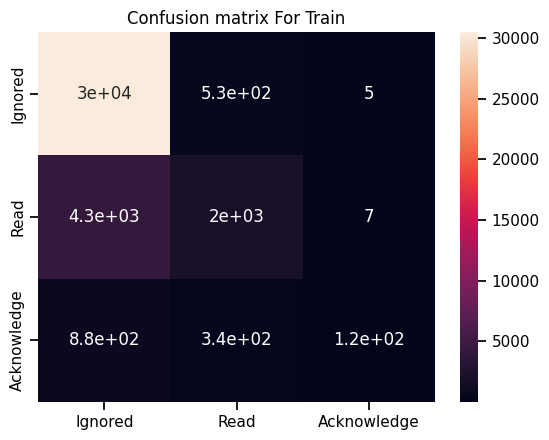

In [439]:
# Visualizing evaluation Metric Score chart
#confusion Matrix For Training
labels=["Ignored","Read","Acknowledge"]
cm=confusion_matrix(y_train,train_class_pred3)
print(cm)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_title("Confusion matrix For Train")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

[[  41 7703    0]
 [   8 1571    0]
 [   3  333    0]]


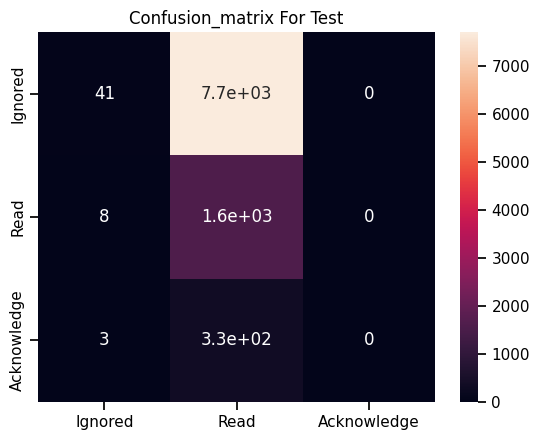

In [440]:
# Visualizing evaluation Metric Score chart
#confusion Matrix For Testing
labels=["Ignored","Read","Acknowledge"]
cm=confusion_matrix(y_test,test_class_pred3)
print(cm)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_title("Confusion_matrix For Test")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [441]:
# Initialize Stratified K-Fold Cross-Validation
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store the scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate over the folds
for train_index, val_index in skf.split(x, y):
    # Split the data into training and validation sets
    x_train, x_val = x.iloc[train_index], x.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model
    model2 = XGBClassifier()
    model2.fit(x_train, y_train)

    # Perform predictions on the validation set
    y_pred = model2.predict(x_val)

    # Calculate and append the scores
    accuracy_scores.append(accuracy_score(y_val, y_pred))
    precision_scores.append(precision_score(y_val, y_pred, average="weighted"))
    recall_scores.append(recall_score(y_val, y_pred, average="weighted"))
    f1_scores.append(f1_score(y_val, y_pred, average="weighted"))

# Print the average scores
print(f"Average Accuracy: {np.mean(accuracy_scores) * 100:.2f}%")
print(f"Average Precision: {np.mean(precision_scores):.2f}")
print(f"Average Recall: {np.mean(recall_scores):.2f}")
print(f"Average F1-Score: {np.mean(f1_scores):.2f}")

Average Accuracy: 81.16%
Average Precision: 0.76
Average Recall: 0.81
Average F1-Score: 0.77


In [442]:
# Predict on the model for train and test data
y_pred_train2 = model2.predict(x_train)
y_pred2 = model2.predict(x_test)

In [443]:
# Get the predicted probabilities
train_probability2 = model2.predict_proba(x_train)
test_probability2 = model2.predict_proba(x_test)

In [444]:
# Result for train
print("Classification Report (Train):\n", classification_report(y_train, y_pred_train2))
print("ROC AUC Score (Train):", roc_auc_score(y_train, train_probability2, multi_class='ovr'))
print()

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.86      0.98      0.91     31018
           1       0.69      0.32      0.43      6273
           2       0.91      0.09      0.17      1342

    accuracy                           0.84     38633
   macro avg       0.82      0.46      0.50     38633
weighted avg       0.83      0.84      0.81     38633

ROC AUC Score (Train): 0.8954635420404298



In [445]:
# Result for test
print("Classification Report (Test):\n", classification_report(y_test, y_pred2))
print("ROC AUC Score (Test):", roc_auc_score(y_test, test_probability2, multi_class='ovr'))


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.79      0.01      0.01      7744
           1       0.16      0.99      0.28      1579
           2       0.00      0.00      0.00       336

    accuracy                           0.17      9659
   macro avg       0.32      0.33      0.10      9659
weighted avg       0.66      0.17      0.05      9659

ROC AUC Score (Test): 0.506882718256214


##### Which hyperparameter optimization technique have you used and why?

I have used Stratified KFold Cross validation technique for optimizing performans of the ml model. As in Stratified KFold Cross validation the proportion of different classes remains consistent across the training and validation sets and it gives better results in case of data inbalaced condition.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For training dataset, I found precision of 86% and recall of 98% and f1-score of 91% for ignored emails. For class 2 i.e., email opened got precision of 69% and recall of 32% and f1-score of 43% and for class 3 i.e., email acknowledged got precision of 91% and recall of 9% and f1-score of 17% Accuracy is 84% and average precision, recall & f1_score are 82%, 46% and 50% respectively with a roc auc score of 68%.

For test dataset, I found precision of 79% and recall of 1% and f1-score of 1% for ignored emails. For class 2 i.e., email opened got precision of 16% and recall of 99% and f1-score of 28% and for class 3 i.e., email acknowledged got precision of 0% and recall of 0% and f1-score of 0% Accuracy is 17% and average precision, recall & f1_score are 32%, 33% and 10% respectively with a roc auc score of 50%.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

When evaluating the effectiveness of an email campaign in a classification model, the following evaluation metrics would be considered for a positive business impact:

* **Precision**: This metric indicates the proportion of true positive predictions (emails that were opened and resulted in a desired action) out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify individuals who are likely to engage with the campaign. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions and is effectively identifying individuals who are likely to engage with the campaign.

* **Recall**: This metric indicates the proportion of true positive predictions (emails that were opened and resulted in a desired action) out of all actual positive instances (emails that were opened and resulted in a desired action). In a business setting, this would indicate the model's ability to identify all individuals who engaged with the campaign. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any individuals who engaged with the campaign.

* **F1 Score**: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in identifying individuals who are likely to engage with the campaign while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is effectively identifying individuals who are likely to engage with the campaign while also being able to identify all individuals who engaged with the campaign.

* **ROC AUC**: This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive (engaged with the campaign) or negative (did not engage with the campaign). A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify individuals as likely to engage with the campaign or not.

The evaluation metrics that would be considered for a positive business impact of an email campaign effectiveness in a classification model are **precision, recall** which combine to provide F1 score. These metrics would indicate the model's ability to identify individuals who are likely to engage with the campaign while also being able to identify all individuals who engaged with the campaign, and correctly classify instances as positive or negative.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I will choose Logistic Regression Model for final prediction, Because of the best performance of the best performance of the model in training as well as prediction of the data. It does not overfit the training dataset compared to the other ml models and the  accuracy,precision,recall and f1-score is also getting increased after using the cross validation techniques.   

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

### **LogisticRegression :**
Training Accuracy 49.43277040092819 % \
Prediction Accuracy 54.45698312454705 % \
Accuracy Of LogisticRegression Model Is:  0.5445698312454705 \
Precision Of LogisticRegression Model Is:  0.757510952520623 \
Recall Of LogisticRegression Model Is:  0.5445698312454705 \
F1 Score Of LogisticRegression Model Is:  0.6210434210218452 \
### **LogisticRegression With Cross validation Techniques :**
Average Accuracy: 80.29% \
Average Precision: 0.72 \
Average Recall: 0.80 \
Average F1-Score: 0.73 \
ROC AUC Score (Train): 0.6810871575694524 \
ROC AUC Score (Test): 0.6243740188218597 \

### **RandomForestClassifier:**
Training Accuracy: 99.90163849558668 \
Prediction Accuracy 18.31452531317942 \
Accuracy Of  Model Is:  0.1831452531317942 \
Precision Of  Model Is:  0.6766487357671398 \
Recall Of  Model Is:  0.1831452531317942 \
F1 Score Of  Model Is:  0.10333977009590749 \
### **RandomForestClassifier: With Cross validation Techniques :**
Average Accuracy: 80.07% \
Average Precision: 0.74 \
Average Recall: 0.80 \
Average F1-Score: 0.76 \
ROC AUC Score (Train): 0.9999968916856035 \
ROC AUC Score (Test): 0.4662545240067582 \

By analysing the above results of two model we can understand that LogisticRegression model has better performance of both training as well as test dataset and having highest ROC curve which is 62% . Thats why I will used LogisticeRegression model for future preference

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [446]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [447]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

+ According to the Email Campaign Type feature, Campaign Type 1 had a very high possibility of being viewed even though relatively few emails were sent. The majority of emails sent under email campaign type 2 were ignored. It appears that campaign 3 was successful because more emails were read and acknowledged even though fewer emails were sent during this campaign. \
* Most Of the types of the Emails are the marketting Email having total percentage of 71% and business Email having percentage out of total is 29%. \
* Most Of the Email source types are the marketting Email having total percentage of 54% and Admin Email Of Products having percentage out of total is 46%. \
+ The highest no of the mails send to the customers during evening time.   \
+ G community has maximum population out of all total which is 40.9 % and A community has lowest population which is 2.5 %. \
+ Highest no of the total past communication is done with the G group customer location. \
+ Email_Type 1 has highest no of Emails ignored,read and acknowledge as compared to Email_Type 2.
+ The percentage of Ignored are highest which is 80%.
The percentage of mails which are read by user are 16% .
The percentage of mails which are acknowledge by user are 4 %. \
+ From heatmap we know that there is a negative correlation between Email_Status and Word_count,Total_Links,Total_Images. \
+ There is a positive relation between the total past communications and Email_status. \
+ For final prediction on ml model we are using LogisticRegression ML Model.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***